In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D
from scipy import integrate

rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]

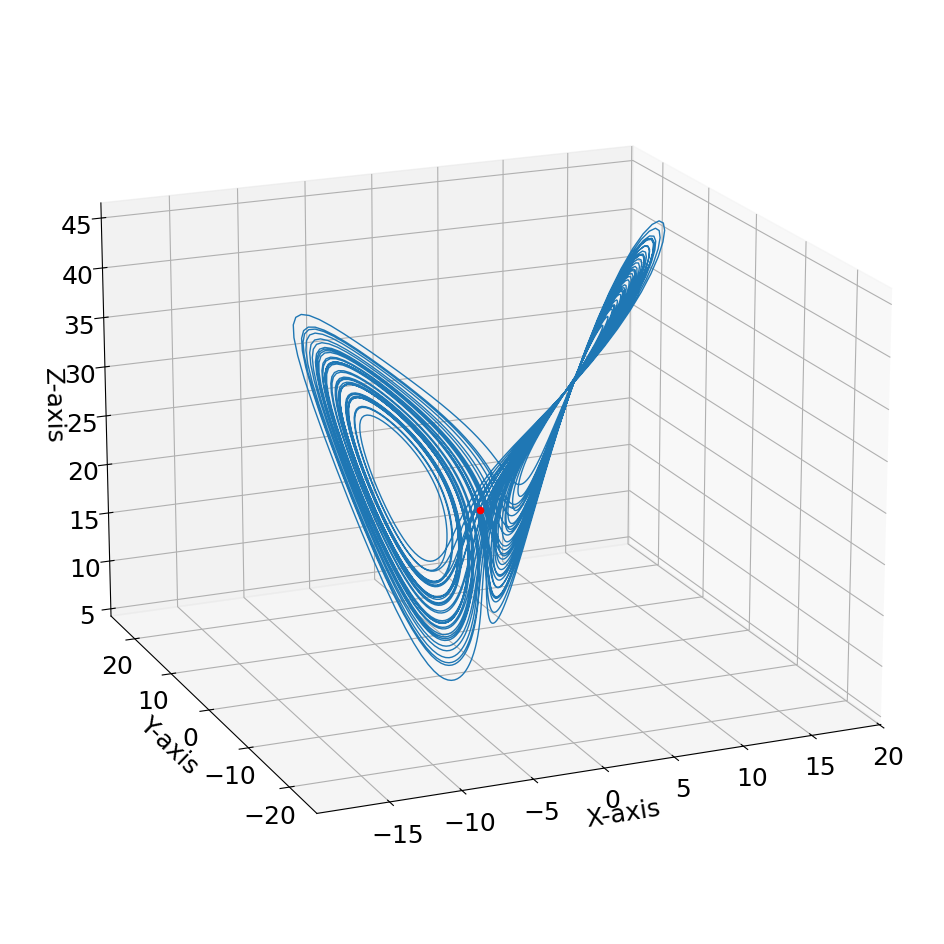

In [2]:
## Simulate the Lorenz System

dt = 0.01
T = 50
t = np.arange(0,T+dt,dt)
beta = 8/3
sigma = 10
rho = 28

fig,ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})


def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

np.random.seed(123)
x0 = (0,1,20)

x_t = integrate.odeint(lorenz_deriv, x0, t,rtol=10**(-12),atol=10**(-12)*np.ones_like(x0))

x, y, z = x_t.T
ax.plot(x, y, z,linewidth=1)
ax.scatter(x0[0],x0[1],x0[2],color='r')
#plt.scatter(10,10,10,color='r')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.view_init(18, -113)
plt.show()

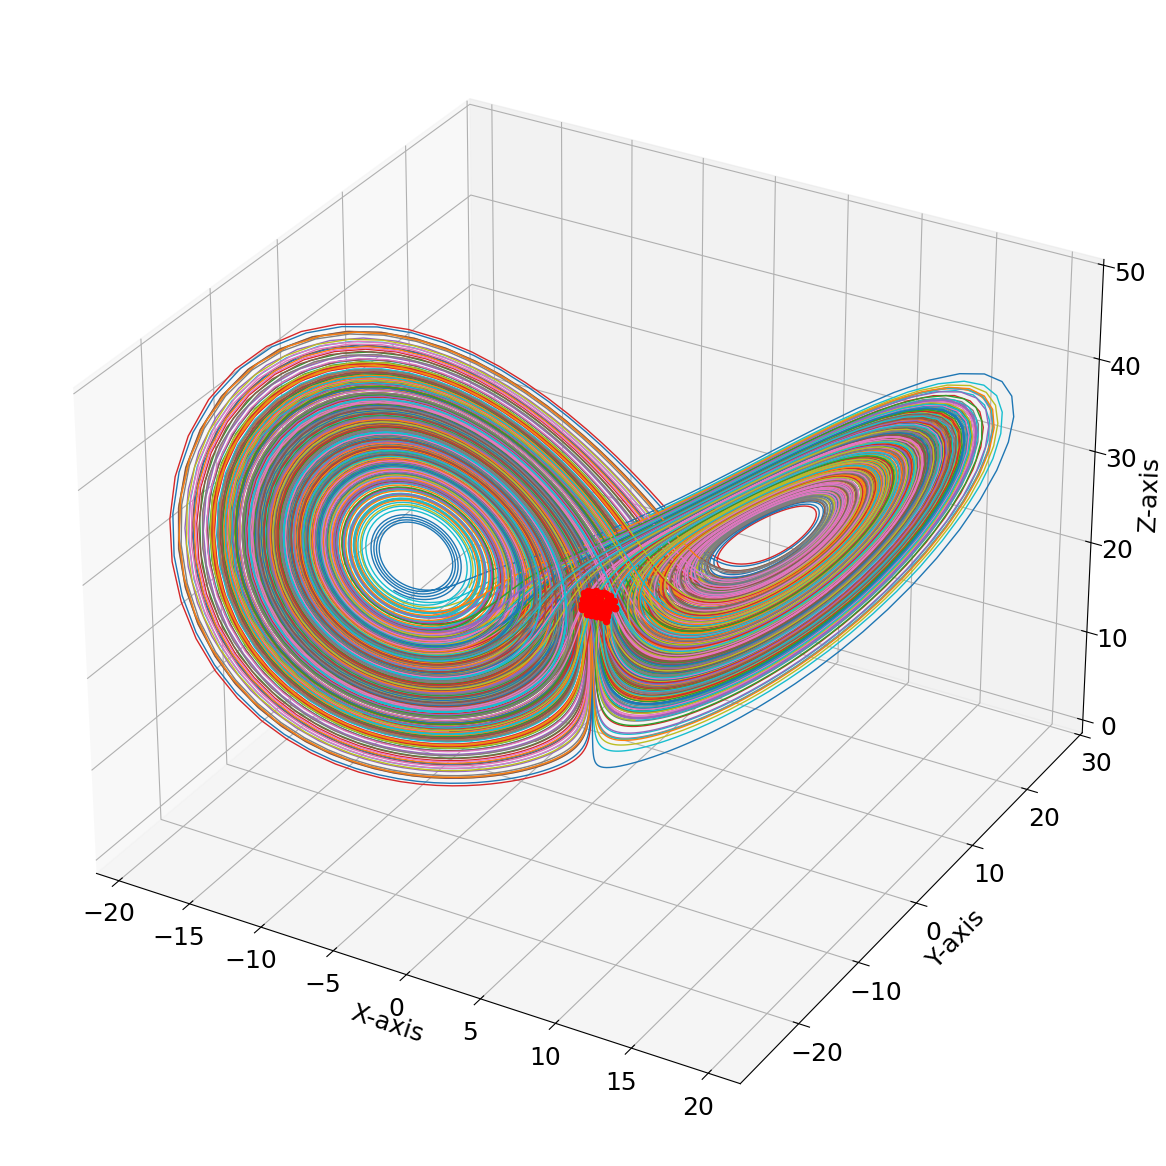

In [3]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
dt = 0.01
T = 8
t = np.arange(0, T + dt, dt)
beta = 8 / 3
sigma = 10
rho = 28

# Lorenz system derivatives
def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

# Initial condition and random perturbations
np.random.seed(123)
x0 = np.array([0, 1, 20])
num_trajectories = 100
perturbation_magnitude = 1

# Prepare the plot
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d'})
#ax.scatter(x0[0], x0[1], x0[2], color='r', label='Initial Conditions')

input = []
output = []
# Generate trajectories
for i in range(num_trajectories):
    perturbed_x0 = x0 + np.random.uniform(-perturbation_magnitude, perturbation_magnitude, size=x0.shape)
    x_t = integrate.odeint(lorenz_deriv, perturbed_x0, t, rtol=1e-12, atol=1e-12 * np.ones_like(x0))
    x, y, z = x_t.T
    ax.plot(x, y, z, linewidth=1)
    ax.scatter(x[0], y[0], z[0], color='r')
    input.append(x_t[:-1])
    output.append(x_t[1:])
    #print(x[0], y[0], z[0])

# Add labels
#ax.set_title('Lorenz System with Random Perturbations')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.tight_layout() 
plt.savefig("lorenz_trajectories.pdf", format="pdf", bbox_inches="tight", transparent=True)
# Display the plot interactively
plt.show()


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

In [5]:
# Convert each array to a PyTorch tensor and concatenate them
input_x = torch.cat([torch.tensor(trajecotry, dtype=torch.float32) for trajecotry in input], dim=0)

# Check the shape of the resulting tensor
print("Input shape:", input_x.shape)

Input shape: torch.Size([80000, 3])


In [6]:
# Convert each array to a PyTorch tensor and concatenate them
output_x = torch.cat([torch.tensor(trajecotry, dtype=torch.float32) for trajecotry in output], dim=0)

# Check the shape of the resulting tensor
print("Output shape:", output_x.shape)

Output shape: torch.Size([80000, 3])


In [ ]:
input_x[1]

tensor([ 0.4114,  0.6018, 18.9441])

In [8]:
print(output_x[0])

tensor([ 0.4114,  0.6018, 18.9441])


In [7]:
import numpy as np

In [4]:
# Custom Layer for Diagonal Matrix
class Layer1(nn.Module):
    def __init__(self, input_size, output_size):
        super(Layer1, self).__init__()
        self.units = input_size*2
        self.use_bias = True
        #assert input_size == output_size, "Diagonal layers must have input_size == output_size"
        self.weights_D = nn.Parameter(torch.ones(input_size))  # Only store the diagonal elements
        # Initialize trainable weights p=1
        self.F1_1 = nn.Parameter(torch.empty(2, 2))
        self.F1_2 = nn.Parameter(torch.empty(2, 2))
        self.d_dash1 = nn.Parameter(torch.empty(6))

        self.weights_D_2 = nn.Parameter(torch.ones(input_size))  # Only store the diagonal elements
        # Initialize trainable weights p =2
        self.F1_1_2 = nn.Parameter(torch.empty(2, 2))
        self.F1_2_2 = nn.Parameter(torch.empty(2, 2))
        self.d_dash2 = nn.Parameter(torch.empty(6))

        self.weights_D_3 = nn.Parameter(torch.ones(input_size))  # Only store the diagonal elements
        # Initialize trainable weights p=3
        self.F1_1_3 = nn.Parameter(torch.empty(2, 2))
        self.F1_2_3 = nn.Parameter(torch.empty(2, 2))
        self.d_dash3 = nn.Parameter(torch.empty(6))

        self.weights_D_4 = nn.Parameter(torch.ones(input_size))  # Only store the diagonal elements
        # Initialize trainable weights p=4
        self.F1_1_4 = nn.Parameter(torch.empty(2, 2))
        self.F1_2_4 = nn.Parameter(torch.empty(2, 2))
        self.d_dash4 = nn.Parameter(torch.empty(6))

        self.weights_D_5 = nn.Parameter(torch.ones(input_size))  # Only store the diagonal elements
        # Initialize trainable weights p=5
        self.F1_1_5 = nn.Parameter(torch.empty(2, 2))
        self.F1_2_5 = nn.Parameter(torch.empty(2, 2))
        self.d_dash5 = nn.Parameter(torch.empty(6))

        self.weights_D_6 = nn.Parameter(torch.ones(input_size))  # Only store the diagonal elements
        # Initialize trainable weights p=6
        self.F1_1_6 = nn.Parameter(torch.empty(2, 2))
        self.F1_2_6 = nn.Parameter(torch.empty(2, 2))
        self.d_dash6 = nn.Parameter(torch.empty(6))


        if self.use_bias:
            self.bias = nn.Parameter(torch.empty(self.units))
            self.bias2 = nn.Parameter(torch.empty(self.units))
            self.bias3 = nn.Parameter(torch.empty(self.units))
            self.bias4 = nn.Parameter(torch.empty(self.units))
            self.bias5 = nn.Parameter(torch.empty(self.units))
            self.bias6 = nn.Parameter(torch.empty(self.units))


        # Initialize weights p=1
        nn.init.xavier_normal_(self.F1_1)
        nn.init.xavier_normal_(self.F1_2)
        nn.init.normal_(self.d_dash1, mean=0.0, std=0.01) 
        # Initialize weights p=2
        nn.init.xavier_normal_(self.F1_1_2)
        nn.init.xavier_normal_(self.F1_2_2)
        nn.init.normal_(self.d_dash2, mean=0.0, std=0.01) 
        # Initialize weights p=3
        nn.init.xavier_normal_(self.F1_1_3)
        nn.init.xavier_normal_(self.F1_2_3)
        nn.init.normal_(self.d_dash3, mean=0.0, std=0.01) 
        # Initialize weights p=4
        nn.init.xavier_normal_(self.F1_1_4)
        nn.init.xavier_normal_(self.F1_2_4)
        nn.init.normal_(self.d_dash4, mean=0.0, std=0.01)
        # Initialize weights p=5
        nn.init.xavier_normal_(self.F1_1_5)
        nn.init.xavier_normal_(self.F1_2_5)
        nn.init.normal_(self.d_dash5, mean=0.0, std=0.01)
        # Initialize weights p=6
        nn.init.xavier_normal_(self.F1_1_6)
        nn.init.xavier_normal_(self.F1_2_6)
        nn.init.normal_(self.d_dash6, mean=0.0, std=0.01) 
        if self.use_bias:
            nn.init.normal_(self.bias, mean=0.0, std=0.01)
            nn.init.normal_(self.bias2, mean=0.0, std=0.01)
            nn.init.normal_(self.bias3, mean=0.0, std=0.01)
            nn.init.normal_(self.bias4, mean=0.0, std=0.01)
            nn.init.normal_(self.bias5, mean=0.0, std=0.01)
            nn.init.normal_(self.bias6, mean=0.0, std=0.01)

    def forward(self, x):
        #Diagonal
        output =  x * self.weights_D  # Element-wise multiplication along the diagonal
        output2 =  x * self.weights_D_2
        output3 =  x * self.weights_D_3
        output4 =  x * self.weights_D_4
        output5 =  x * self.weights_D_5
        output6 =  x * self.weights_D_6
        # J
        output = torch.concat((output, torch.zeros(x.shape[0], x.shape[1])), dim=1)
        output2 = torch.concat((output2, torch.zeros(x.shape[0], x.shape[1])), dim=1)
        output3 = torch.concat((output3, torch.zeros(x.shape[0], x.shape[1])), dim=1)
        output4 = torch.concat((output4, torch.zeros(x.shape[0], x.shape[1])), dim=1)
        output5 = torch.concat((output5, torch.zeros(x.shape[0], x.shape[1])), dim=1)
        output6 = torch.concat((output6, torch.zeros(x.shape[0], x.shape[1])), dim=1)


        def calculateF(out, d_dash, F1, F2):
            # Perform element-wise multiplications
            cal1 = out[:, :out.shape[1] // 2] * d_dash[:out.shape[1] // 2]
            cal2 = out[:, out.shape[1] // 2:] * d_dash[:out.shape[1] // 2]

            # Concatenate intermediate results
            out = torch.cat([
                out[:, :out.shape[1] // 2] + out[:, out.shape[1] // 2:],
                cal1 - cal2
            ], dim=1)

            # Conditional computation based on input dimensions
            if out.shape[1] == 4:
                out = torch.cat([
                    torch.matmul(out[:, :2], F1),
                    torch.matmul(out[:, 2:], F2)
                ], dim=1)
            else:
                out1 = out[:, :out.shape[1] // 2]
                out2 = out[:, out.shape[1] // 2:]
                out = torch.cat([
                    calculateF(out1, d_dash[out.shape[1] // 2:], F1, F2),
                    calculateF(out2, d_dash[out.shape[1] // 2:], F1, F2)
                ], dim=1)

            # Interleave rows for final output
            out = torch.cat([out[:, ::2], out[:, 1::2]], dim=1)
            return out

        # Call the recursive function
        out = calculateF(output, self.d_dash1, self.F1_1, self.F1_2)
        out2 = calculateF(output2, self.d_dash2, self.F1_1_2, self.F1_2_2)
        out3 = calculateF(output3, self.d_dash3, self.F1_1_3, self.F1_2_3)
        out4 = calculateF(output4, self.d_dash4, self.F1_1_4, self.F1_2_4)
        out5 = calculateF(output5, self.d_dash5, self.F1_1_5, self.F1_2_5)
        out6 = calculateF(output6, self.d_dash6, self.F1_1_6, self.F1_2_6)

        # Add bias if applicable
        if self.use_bias:
            out = out + self.bias
            out2 = out2 + self.bias2
            out3 = out3 + self.bias3
            out4 = out4 + self.bias4
            out5 = out5 + self.bias5
            out6 = out6 + self.bias6
        return torch.concat((out, out2, out3, out4, out5, out6), dim=1)

In [5]:
# Custom Layer for Diagonal Matrix
class Layer2(nn.Module):
    def __init__(self, input_size, output_size):
        super(Layer2, self).__init__()
        self.units = input_size
        self.output_size = output_size
        #assert input_size == output_size, "Diagonal layers must have input_size == output_size"
        self.weights_D = nn.Parameter(torch.ones(input_size))  # Only store the diagonal elements
        self.use_bias = True
        # Initialize trainable weights
        self.F1_1 = nn.Parameter(torch.empty(2, 2))
        self.F1_2 = nn.Parameter(torch.empty(2, 2))
        self.d_dash1 = nn.Parameter(torch.empty(6))

        self.weights_D_2 = nn.Parameter(torch.ones(input_size))  # Only store the diagonal elements
        # Initialize trainable weights
        self.F1_1_2 = nn.Parameter(torch.empty(2, 2))
        self.F1_2_2 = nn.Parameter(torch.empty(2, 2))
        self.d_dash2 = nn.Parameter(torch.empty(6))

        self.weights_D_3 = nn.Parameter(torch.ones(input_size))  # Only store the diagonal elements
        # Initialize trainable weights
        self.F1_1_3 = nn.Parameter(torch.empty(2, 2))
        self.F1_2_3 = nn.Parameter(torch.empty(2, 2))
        self.d_dash3 = nn.Parameter(torch.empty(6))

        self.weights_D_4 = nn.Parameter(torch.ones(input_size))  # Only store the diagonal elements
        # Initialize trainable weights
        self.F1_1_4 = nn.Parameter(torch.empty(2, 2))
        self.F1_2_4 = nn.Parameter(torch.empty(2, 2))
        self.d_dash4 = nn.Parameter(torch.empty(6))

        self.weights_D_5 = nn.Parameter(torch.ones(input_size))  # Only store the diagonal elements
        # Initialize trainable weights
        self.F1_1_5 = nn.Parameter(torch.empty(2, 2))
        self.F1_2_5 = nn.Parameter(torch.empty(2, 2))
        self.d_dash5 = nn.Parameter(torch.empty(6))

        self.weights_D_6 = nn.Parameter(torch.ones(input_size))  # Only store the diagonal elements
        # Initialize trainable weights
        self.F1_1_6 = nn.Parameter(torch.empty(2, 2))
        self.F1_2_6 = nn.Parameter(torch.empty(2, 2))
        self.d_dash6 = nn.Parameter(torch.empty(6))

        if self.use_bias:
            self.bias = nn.Parameter(torch.empty(self.output_size))
            self.bias2 = nn.Parameter(torch.empty(self.output_size))
            self.bias3 = nn.Parameter(torch.empty(self.output_size))
            self.bias4 = nn.Parameter(torch.empty(self.output_size))
            self.bias5 = nn.Parameter(torch.empty(self.output_size))
            self.bias6 = nn.Parameter(torch.empty(self.output_size))

        # Initialize weights
        nn.init.xavier_normal_(self.F1_1)
        nn.init.xavier_normal_(self.F1_2)
        nn.init.normal_(self.d_dash1, mean=0.0, std=0.01)

        nn.init.xavier_normal_(self.F1_1_2)
        nn.init.xavier_normal_(self.F1_2_2)
        nn.init.normal_(self.d_dash2, mean=0.0, std=0.01)

        nn.init.xavier_normal_(self.F1_1_3)
        nn.init.xavier_normal_(self.F1_2_3)
        nn.init.normal_(self.d_dash3, mean=0.0, std=0.01)

        nn.init.xavier_normal_(self.F1_1_4)
        nn.init.xavier_normal_(self.F1_2_4)
        nn.init.normal_(self.d_dash4, mean=0.0, std=0.01)

        nn.init.xavier_normal_(self.F1_1_5)
        nn.init.xavier_normal_(self.F1_2_5)
        nn.init.normal_(self.d_dash5, mean=0.0, std=0.01)

        nn.init.xavier_normal_(self.F1_1_6)
        nn.init.xavier_normal_(self.F1_2_6)
        nn.init.normal_(self.d_dash6, mean=0.0, std=0.01) 
        if self.use_bias:
            nn.init.normal_(self.bias, mean=0.0, std=0.01)
            nn.init.normal_(self.bias2, mean=0.0, std=0.01)
            nn.init.normal_(self.bias3, mean=0.0, std=0.01)
            nn.init.normal_(self.bias4, mean=0.0, std=0.01)
            nn.init.normal_(self.bias5, mean=0.0, std=0.01)
            nn.init.normal_(self.bias6, mean=0.0, std=0.01)

    def forward(self, x):
        input1 = x[:, :self.units]
        input2 = x[:, self.units:self.units*2]
        input3 = x[:, self.units*2:self.units*3]
        input4 = x[:, self.units*3:self.units*4]
        input5 = x[:, self.units*4:self.units*5]
        input6 = x[:, self.units*5:self.units*6]
        #Diagonal
        output1 =  input1 * self.weights_D
        output2 =  input2 * self.weights_D_2  # Element-wise multiplication along the diagonal
        output3 =  input3 * self.weights_D_3
        output4 =  input4 * self.weights_D_4
        output5 =  input5 * self.weights_D_5
        output6 =  input6 * self.weights_D_6

        def calculateF(out, d_dash, F1, F2):
            # Interleave rows for final output
            out = torch.cat([out[:, ::2], out[:, 1::2]], dim=1)

            # Conditional computation based on input dimensions
            if out.shape[1] == 4:
                out = torch.cat([
                    torch.matmul(out[:, :2], F1),
                    torch.matmul(out[:, 2:], F2)
                ], dim=1)
            else:
                out1 = out[:, :out.shape[1] // 2]
                out2 = out[:, out.shape[1] // 2:]
                out = torch.cat([
                    calculateF(out1, d_dash[out.shape[1] // 2:], F1, F2),
                    calculateF(out2, d_dash[out.shape[1] // 2:], F1, F2)
                ], dim=1)

            # Perform element-wise multiplications
            #cal1 = out[:, :out.shape[1] // 2] * d_dash[:out.shape[1] // 2]
            cal2 = out[:, out.shape[1] // 2:] * d_dash[:out.shape[1] // 2]

            # Concatenate intermediate results
            out = torch.cat([
                out[:, :out.shape[1] // 2] + cal2,
                out[:, :out.shape[1] // 2] - cal2
            ], dim=1)
            
            return out

        # Call the recursive function
        out1 = calculateF(output1, self.d_dash1, self.F1_1, self.F1_2)
        out2 = calculateF(output2, self.d_dash2, self.F1_1_2, self.F1_2_2)
        out3 = calculateF(output3, self.d_dash3, self.F1_1_3, self.F1_2_3)
        out4 = calculateF(output4, self.d_dash4, self.F1_1_4, self.F1_2_4)
        out5 = calculateF(output5, self.d_dash5, self.F1_1_5, self.F1_2_5)
        out6 = calculateF(output6, self.d_dash6, self.F1_1_6, self.F1_2_6)


        # Add bias if applicable
        if self.use_bias:
            out = out1[:, :self.units // 2] + self.bias
            out2 = out2[:, :self.units // 2] + self.bias2
            out3 = out3[:, :self.units // 2] + self.bias3
            out4 = out4[:, :self.units // 2] + self.bias4
            out5 = out5[:, :self.units // 2] + self.bias5
            out6 = out6[:, :self.units // 2] + self.bias6
        return torch.concat((out, out2, out3, out4, out5, out6), dim=1)

In [6]:
# Custom Layer for Diagonal Matrix
class Layer3(nn.Module):
    def __init__(self, input_size, output_size):
        super(Layer3, self).__init__()
        self.units = input_size
        #assert input_size == output_size, "Diagonal layers must have input_size == output_size"
        self.weights_D = nn.Parameter(torch.ones(input_size))  # Only store the diagonal elements
        self.use_bias = True
        self.weights_D_2 = nn.Parameter(torch.ones(input_size))
        self.weights_D_3 = nn.Parameter(torch.ones(input_size))
        self.weights_D_4 = nn.Parameter(torch.ones(input_size))
        self.weights_D_5 = nn.Parameter(torch.ones(input_size))
        self.weights_D_6 = nn.Parameter(torch.ones(input_size))

        if self.use_bias:
            self.bias = nn.Parameter(torch.empty(self.units))
            self.bias2 = nn.Parameter(torch.empty(self.units))
            self.bias3 = nn.Parameter(torch.empty(self.units))
            self.bias4 = nn.Parameter(torch.empty(self.units))
            self.bias5 = nn.Parameter(torch.empty(self.units))
            self.bias6 = nn.Parameter(torch.empty(self.units))
        if self.use_bias:
            nn.init.normal_(self.bias, mean=0.0, std=0.01)
            nn.init.normal_(self.bias2, mean=0.0, std=0.01)
            nn.init.normal_(self.bias3, mean=0.0, std=0.01)
            nn.init.normal_(self.bias4, mean=0.0, std=0.01)
            nn.init.normal_(self.bias5, mean=0.0, std=0.01)
            nn.init.normal_(self.bias6, mean=0.0, std=0.01)

    def forward(self, x):
        input1 = x[:, :self.units]
        input2 = x[:, self.units:self.units*2]
        input3 = x[:, self.units*2:self.units*3]
        input4 = x[:, self.units*3:self.units*4]
        input5 = x[:, self.units*4:self.units*5]
        input6 = x[:, self.units*5:self.units*6]

        #Diagonal
        output =  input1 * self.weights_D  # Element-wise multiplication along the diagonal
        output2 =  input2 * self.weights_D_2
        output3 =  input3 * self.weights_D_3
        output4 =  input4 * self.weights_D_4 
        output5 =  input5 * self.weights_D_5 
        output6 =  input6 * self.weights_D_6 

        # Add bias if applicable
        if self.use_bias:
            out = output + self.bias
            out2 = output2 + self.bias2
            out3 = output3 + self.bias3
            out4 = output4 + self.bias4
            out5 = output5 + self.bias5
            out6 = output6 + self.bias6
        return torch.concat((out, out2, out3, out4, out5, out6), dim=1)

In [7]:
# Custom Layer for Diagonal Matrix
class Layer4(nn.Module):
    def __init__(self, input_size, output_size):
        super(Layer4, self).__init__()
        self.units = input_size
        #assert input_size == output_size, "Diagonal layers must have input_size == output_size"
        self.weights_D = nn.Parameter(torch.ones(input_size))  # Only store the diagonal elements
        self.use_bias = True
        self.weights_D_2 = nn.Parameter(torch.ones(input_size))
        self.weights_D_3 = nn.Parameter(torch.ones(input_size))
        self.weights_D_4 = nn.Parameter(torch.ones(input_size))
        self.weights_D_5 = nn.Parameter(torch.ones(input_size))
        self.weights_D_6 = nn.Parameter(torch.ones(input_size))

        if self.use_bias:
            self.bias = nn.Parameter(torch.empty(self.units))
        if self.use_bias:
            nn.init.normal_(self.bias, mean=0.0, std=0.01)

    def forward(self, x):
        input1 = x[:, :self.units]
        input2 = x[:, self.units:self.units*2]
        input3 = x[:, self.units*2:self.units*3]
        input4 = x[:, self.units*3:self.units*4]
        input5 = x[:, self.units*4:self.units*5]
        input6 = x[:, self.units*5:self.units*6]

        #Diagonal
        output =  input1 * self.weights_D  # Element-wise multiplication along the diagonal
        output2 =  input2 * self.weights_D_2
        output3 =  input3 * self.weights_D_3
        output4 =  input4 * self.weights_D_4
        output5 =  input5 * self.weights_D_5
        output6 =  input6 * self.weights_D_6 

        return output + output2 + output3 + output4 + output5 + output6 + self.bias

In [8]:
import torch_levenberg_marquardt as tlm

# Set PyTorch to use high precision for matrix multiplication
torch.set_float32_matmul_precision('high')

# Detect CUDA device for acceleration
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = 'cpu'
print(f'Using device: {device}')

Using device: cpu


In [13]:
from torch.utils.data import TensorDataset, DataLoader, random_split

# Define dataset



In [9]:
# %%
# Define a function to create the neural network model
def create_model() -> torch.nn.Module:
    return torch.nn.Sequential(
        Layer1(4, 4),
        torch.nn.Tanh(),
        Layer2(8, 4),
        torch.nn.Sigmoid(),
        Layer3(4, 4),
        torch.nn.ReLU(),
        Layer4(4, 4),
    ).to(device)

In [111]:
# # Neural Network Model
# class CustomNN(nn.Module):
#     def __init__(self):
#         super(CustomNN, self).__init__()
#         self.layer1 = Layer1(4, 4)
#         self.activation1 = nn.LeakyReLU(negative_slope=0.02)
#         self.layer2 = Layer2(8, 4)
#         self.activation2 = nn.LeakyReLU(negative_slope=0.02)
#         self.layer3 = Layer3(4, 4)
#         self.activation3 = nn.LeakyReLU(negative_slope=0.02)
#         self.layer4 = Layer4(4, 4)

#     def forward(self, x):
#         x = self.layer1(x)
#         x = self.activation1(x)
#         x = self.layer2(x)
#         x = self.activation2(x)
#         x = self.layer3(x)
#         x = self.activation3(x)
#         x = self.layer4(x)
#         return x

In [10]:
import time
import torch
import torch_levenberg_marquardt as tlm
from bokeh.plotting import figure, output_notebook, show
from torch.utils.data import TensorDataset

In [17]:
input_x.shape

torch.Size([80000, 3])

In [24]:
# Add a column of zeros to make input and output m x 4
input_x_new = np.hstack([input_x, np.zeros((input_x.shape[0], 1))])  # Pad inputs with zeros
output_x_new = np.hstack([output_x, np.zeros((output_x.shape[0], 1))])  # Pad outputs with zeros

# Convert NumPy arrays to PyTorch tensors
input_x_new = torch.tensor(input_x_new, dtype=torch.float32)
output_x_new = torch.tensor(output_x_new, dtype=torch.float32)

dataset = TensorDataset(input_x_new, output_x_new)

# Split sizes: 80% training, 20% validation
train_size = int(0.8 * len(dataset))  # 80% of 80,000
val_size = len(dataset) - train_size  # Remaining 20%

# Split the dataset
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])


# Create dataset and dataloader
#train_dataset = TensorDataset(input_x, output_x)
train_loader = tlm.utils.FastDataLoader(
    train_dataset,
    batch_size=1000,
    repeat=10,
    shuffle=True,
    device=device,
)

val_loader = tlm.utils.FastDataLoader(
    val_dataset,
    batch_size=1000,
    repeat=10,
    shuffle=True,
    device=device,
)

Epoch 2/20:  64%|██████▍   | 411/640 [01:11<00:39,  5.76it/s, loss=1.5751e+01, damping=1.0000e-04, attempts=1]


In [57]:
# # Custom Dataset for sequential data
# class TimeSeriesDataset(Dataset):
#     def __init__(self, input, output):
#         # Generate (x, y) pairs from sequential data

#         # Add a column of zeros to make input and output m x 4
#         self.x = np.hstack([input, np.zeros((input.shape[0], 1))])  # Pad inputs with zeros
#         self.y = np.hstack([output, np.zeros((output.shape[0], 1))])  # Pad outputs with zeros

#         # Shuffle the pairs
#         indices = np.random.permutation(len(self.x))
#         self.x = self.x[indices]
#         self.y = self.y[indices]

#     def __len__(self):
#         return len(self.x)

#     def __getitem__(self, index):
#         return self.x[index], self.y[index]

In [58]:
# from sklearn.model_selection import train_test_split

# # Function to create train and validation loaders
# def create_train_val_loaders(input, output, batch_size=64, val_split=0.2):
#     # Split data into training and validation sets
#     x_train, x_val, y_train, y_val = train_test_split(input, output, test_size=val_split, random_state=42)
    
#     # Create Dataset objects for training and validation
#     train_dataset = TimeSeriesDataset(x_train, y_train)
#     val_dataset = TimeSeriesDataset(x_val, y_val)
    
#     # Create DataLoader objects for training and validation
#     train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
#     val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    
#     return train_loader, val_loader

# # Example usage
# #input_data = np.random.rand(1000, 3)  # Replace with your input data
# #output_data = np.random.rand(1000, 3)  # Replace with your output data

# train_loader, val_loader = create_train_val_loaders(input_x, output_x, batch_size=64, val_split=0.2)


In [59]:
# def train_model(model, train_dataloader, val_dataloader, criterion, optimizer, epochs=20):
#     model.train()
#     train_loss_per_epoch = []
#     val_loss_per_epoch = []
    
#     for epoch in range(epochs):
#         # Training phase
#         total_train_loss = 0
#         for x, y in train_dataloader:
#             x, y = x.float(), y.float()
#             optimizer.zero_grad()
#             outputs = model(x)
#             loss = criterion(outputs, y)
#             loss.backward()
#             optimizer.step()
#             total_train_loss += loss.item()
        
#         avg_train_loss = total_train_loss / len(train_dataloader)
#         train_loss_per_epoch.append(avg_train_loss)
        
#         # Validation phase
#         model.eval()  # Set the model to evaluation mode
#         total_val_loss = 0
#         with torch.no_grad():  # Disable gradient computation
#             for x_val, y_val in val_dataloader:
#                 x_val, y_val = x_val.float(), y_val.float()
#                 outputs = model(x_val)
#                 val_loss = criterion(outputs, y_val)
#                 total_val_loss += val_loss.item()
        
#         avg_val_loss = total_val_loss / len(val_dataloader)
#         val_loss_per_epoch.append(avg_val_loss)
        
#         print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.8f}, Val Loss: {avg_val_loss:.8f}")
    
#     return train_loss_per_epoch, val_loss_per_epoch



In [60]:
# # Example usage
# if __name__ == "__main__":
#     # Simulated data for demonstration (replace with your actual data)
#     data = x_t  # Random data: 50,001 samples of (x, y, z)

#     # Prepare dataset and dataloader
#     #dataloader = prepare_data(input_x, output_x)

#     model = CustomNN()
#     criterion = nn.MSELoss()  # Example: Mean Squared Error loss
#     optimizer = optim.Adam(model.parameters(), lr=0.001)

#     # Train the model
#     epochs = 50
#     train_loss, val_loss = train_model(model, train_loader, val_loader, criterion, optimizer, epochs)

#     # Plot the training and validation loss (optional)
#     import matplotlib.pyplot as plt

#     plt.plot(range(1, epochs + 1), train_loss, label='Train Loss')
#     plt.plot(range(1, epochs + 1), val_loss, label='Validation Loss')
#     plt.xlabel('Epochs')
#     plt.ylabel('Loss')
#     plt.legend()
#     plt.title('Training and Validation Loss')
#     plt.show()
#     # Save the model
#     #torch.save(model.state_dict(), "time_series_model.pth")


In [25]:
# Example usage
if __name__ == "__main__":
    # Simulated data for demonstration (replace with your actual data)
    data = x_t  # Random data: 50,001 samples of (x, y, z)

    # Prepare dataset and dataloader
    #dataloader = prepare_data(input_x, output_x)

    model = create_model()

    module_lm = tlm.training.LevenbergMarquardtModule(
    model=model,
    loss_fn=tlm.loss.MSELoss(),
    learning_rate=1.0,
    attempts_per_step=20,
    solve_method='qr',
    )

    loss_all, val_loss_all = tlm.utils.fit(
    module_lm,
    train_loader,
    epochs=20,
    overwrite_progress_bar = False,
    val_loader=val_loader,
    )
    # Save the model
    #torch.save(model.state_dict(), "time_series_model.pth")


                                                                                                              
Epoch 1/20: 100%|██████████| 640/640 [00:55<00:00, 11.52it/s, loss=1.6706e-05, damping=1.0000e-03, attempts=2]


Epoch 1 complete. Average loss: 5.6987e-01


                                                                                                              
Epoch 2/20: 100%|██████████| 640/640 [00:57<00:00, 11.22it/s, loss=8.6261e-06, damping=1.0000e-03, attempts=2]


Epoch 2 complete. Average loss: 1.2031e-05


                                                                                                              
Epoch 3/20: 100%|██████████| 640/640 [01:00<00:00, 10.66it/s, loss=8.0819e-06, damping=1.0000e-03, attempts=2]


Epoch 3 complete. Average loss: 8.2458e-06


                                                                                                              
Epoch 4/20: 100%|██████████| 640/640 [01:00<00:00, 10.64it/s, loss=6.3890e-06, damping=1.0000e-03, attempts=2]


Epoch 4 complete. Average loss: 6.2291e-06


                                                                                                              
Epoch 5/20: 100%|██████████| 640/640 [01:00<00:00, 10.58it/s, loss=4.5934e-06, damping=1.0000e-03, attempts=2]


Epoch 5 complete. Average loss: 5.1648e-06


                                                                                                              
Epoch 6/20: 100%|██████████| 640/640 [00:59<00:00, 10.82it/s, loss=3.9414e-06, damping=1.0000e-03, attempts=2]


Epoch 6 complete. Average loss: 4.5853e-06


                                                                                                              
Epoch 7/20: 100%|██████████| 640/640 [00:58<00:00, 10.99it/s, loss=4.1121e-06, damping=1.0000e-03, attempts=2]


Epoch 7 complete. Average loss: 4.1661e-06


                                                                                                              
Epoch 8/20: 100%|██████████| 640/640 [00:59<00:00, 10.72it/s, loss=3.5313e-06, damping=1.0000e-03, attempts=2]


Epoch 8 complete. Average loss: 3.8780e-06


                                                                                                              
Epoch 9/20: 100%|██████████| 640/640 [01:02<00:00, 10.21it/s, loss=4.2000e-06, damping=1.0000e-03, attempts=2]


Epoch 9 complete. Average loss: 3.6369e-06


                                                                                                               
Epoch 10/20: 100%|██████████| 640/640 [00:59<00:00, 10.84it/s, loss=3.8874e-06, damping=1.0000e-03, attempts=2]


Epoch 10 complete. Average loss: 3.4322e-06


                                                                                                               
Epoch 11/20: 100%|██████████| 640/640 [00:59<00:00, 10.79it/s, loss=2.6351e-06, damping=1.0000e-03, attempts=2]


Epoch 11 complete. Average loss: 3.2570e-06


                                                                                                               
Epoch 12/20: 100%|██████████| 640/640 [00:58<00:00, 11.02it/s, loss=2.5035e-06, damping=1.0000e-03, attempts=2]


Epoch 12 complete. Average loss: 3.1075e-06


                                                                                                               
Epoch 13/20: 100%|██████████| 640/640 [00:58<00:00, 10.86it/s, loss=3.1483e-06, damping=1.0000e-03, attempts=2]


Epoch 13 complete. Average loss: 2.9663e-06


                                                                                                               
Epoch 14/20: 100%|██████████| 640/640 [01:18<00:00,  8.17it/s, loss=2.5163e-06, damping=1.0000e-03, attempts=2]


Epoch 14 complete. Average loss: 2.8394e-06


                                                                                                               
Epoch 15/20: 100%|██████████| 640/640 [01:05<00:00,  9.75it/s, loss=2.8697e-06, damping=1.0000e-03, attempts=2]


Epoch 15 complete. Average loss: 2.7337e-06


                                                                                                               
Epoch 16/20: 100%|██████████| 640/640 [01:07<00:00,  9.43it/s, loss=2.5999e-06, damping=1.0000e-03, attempts=2]


Epoch 16 complete. Average loss: 2.6193e-06


                                                                                                               
Epoch 17/20: 100%|██████████| 640/640 [01:03<00:00, 10.01it/s, loss=2.8387e-06, damping=1.0000e-03, attempts=2]


Epoch 17 complete. Average loss: 2.5216e-06


                                                                                                               
Epoch 18/20: 100%|██████████| 640/640 [01:02<00:00, 10.20it/s, loss=2.7271e-06, damping=1.0000e-03, attempts=2]


Epoch 18 complete. Average loss: 2.4391e-06


                                                                                                               
Epoch 19/20: 100%|██████████| 640/640 [01:01<00:00, 10.32it/s, loss=1.9713e-06, damping=1.0000e-03, attempts=2]


Epoch 19 complete. Average loss: 2.3578e-06


                                                                                                               
Epoch 20/20: 100%|██████████| 640/640 [01:01<00:00, 10.39it/s, loss=2.8845e-06, damping=1.0000e-03, attempts=2]

Epoch 20 complete. Average loss: 2.2787e-06


In [148]:
# Calculate and display the number of parameters for each layer
print("Layer Name | Number of Parameters")
print("---------------------------------")
total_params = 0
for name, param in loaded_model.named_parameters():
    num_params = param.numel()  # Number of elements in the parameter tensor
    total_params += num_params
    print(f"{name:<20} {num_params}")

print("---------------------------------")
print(f"Total parameters: {total_params}")

Layer Name | Number of Parameters
---------------------------------
0.weights_D          4
0.F1_1               4
0.F1_2               4
0.d_dash1            6
0.weights_D_2        4
0.F1_1_2             4
0.F1_2_2             4
0.d_dash2            6
0.weights_D_3        4
0.F1_1_3             4
0.F1_2_3             4
0.d_dash3            6
0.weights_D_4        4
0.F1_1_4             4
0.F1_2_4             4
0.d_dash4            6
0.weights_D_5        4
0.F1_1_5             4
0.F1_2_5             4
0.d_dash5            6
0.weights_D_6        4
0.F1_1_6             4
0.F1_2_6             4
0.d_dash6            6
0.bias               8
0.bias2              8
0.bias3              8
0.bias4              8
0.bias5              8
0.bias6              8
2.weights_D          8
2.F1_1               4
2.F1_2               4
2.d_dash1            6
2.weights_D_2        8
2.F1_1_2             4
2.F1_2_2             4
2.d_dash2            6
2.weights_D_3        8
2.F1_1_3             4
2.F1_2_3    

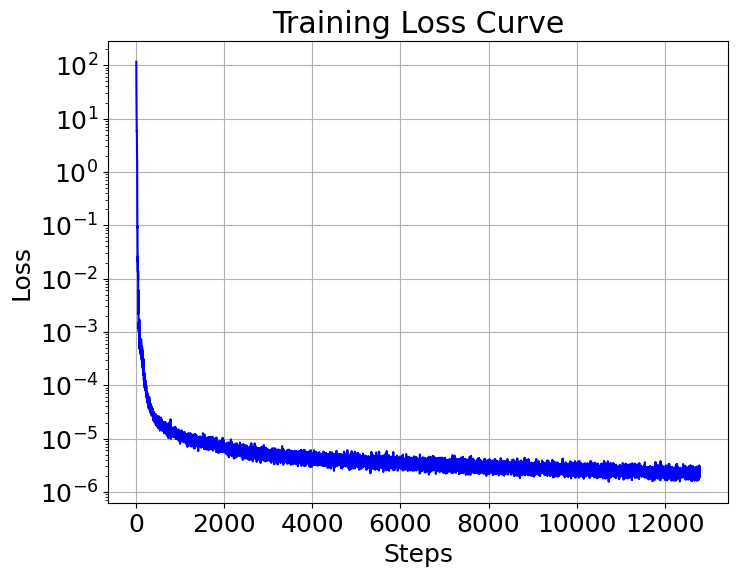

In [31]:
# Plot the loss curve
loss_all_cpu = [loss_item.cpu().numpy() for loss_item in loss_all]
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(loss_all_cpu) + 1), loss_all_cpu, linestyle="-", color="b")
plt.title("Training Loss Curve")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.yscale("log")
plt.grid(True)
plt.show()

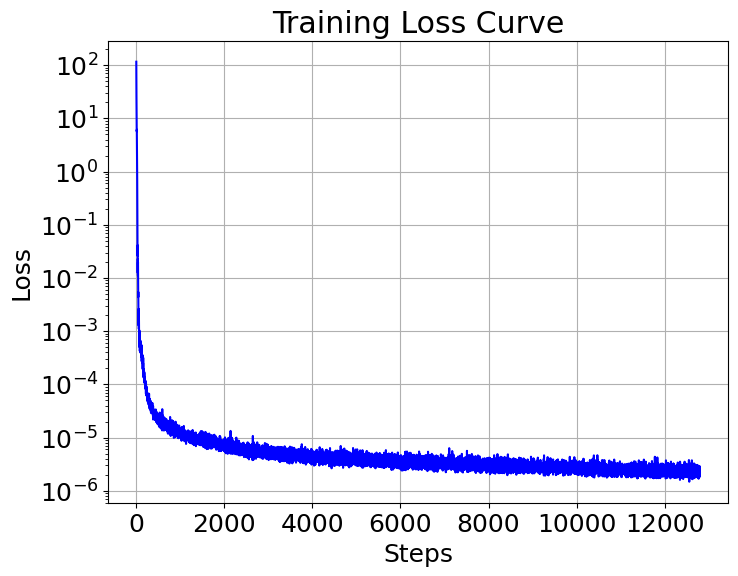

In [33]:
# Plot the loss curve
loss_all_cpu = [loss_item for loss_item in val_loss_all]
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(loss_all_cpu) + 1), loss_all_cpu, linestyle="-", color="b")
plt.title("Training Loss Curve")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.yscale("log")
plt.grid(True)
plt.show()

In [30]:
import torch

# Define a function to save the trained model
def save_model(model: torch.nn.Module, file_path: str):
    # Save the model's state dictionary
    torch.save(model.state_dict(), file_path)

# Save the trained model to a file
save_model(model, "SNN_model_p_6_new.pth")
print("Model saved to 'trained_model.pth'")


Model saved to 'trained_model.pth'


In [34]:
import pandas as pd

# Create a DataFrame for the loss values
loss_df = pd.DataFrame({
    "Step": range(1, len(loss_all_cpu) + 1),
    "Loss": loss_all_cpu
})

# Save the DataFrame to a CSV file
loss_df.to_csv("SNN_loss_curve_p_6_new_vali.csv", index=False)
print("Loss curve saved to 'loss_curve.csv'")


Loss curve saved to 'loss_curve.csv'


In [16]:
# Load the saved model
def load_model(file_path: str, device: torch.device) -> torch.nn.Module:
    model = create_model().to(device)  # Initialize the model
    model.load_state_dict(torch.load(file_path, map_location=device))  # Load the state dictionary
    model.eval()  # Set the model to evaluation mode
    return model

# Example usage
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_path = "SNN_model_p_6.pth"  # Path to your saved model
loaded_model = load_model(model_path, "cpu")

print("Model successfully loaded!")

Model successfully loaded!


/tmp/ipykernel_788/91669994.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(file_path, map_location=device))  # Load the state dictionar

In [35]:
loaded_model = model

/tmp/ipykernel_788/4135138431.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  current_state = torch.tensor(initial_condition, dtype=torch.float32)  # Convert initial condition to tensor


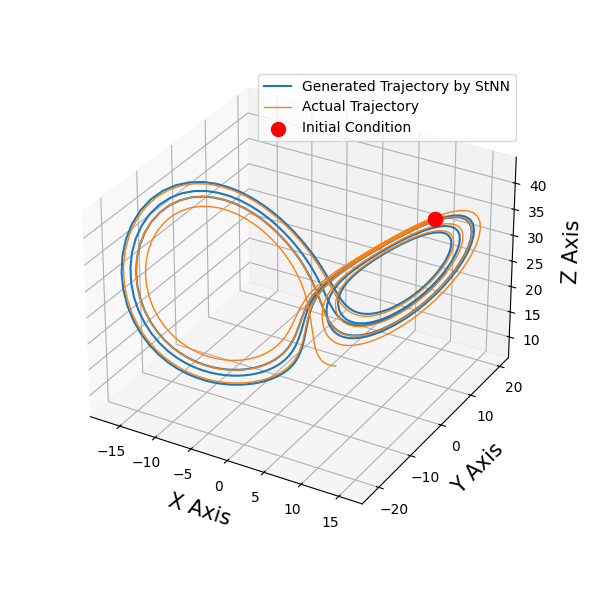

In [18]:
#Set model to evaluation mode
#model = loaded_model.to("cpu")
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = [6, 6]
loaded_model.eval()

# Generate a trajectory using the model
def generate_trajectory(initial_condition, num_steps):
    trajectory = []
    current_state = torch.tensor(initial_condition, dtype=torch.float32)  # Convert initial condition to tensor

    for _ in range(num_steps):
        # Predict the next state
        next_state = loaded_model(current_state)

        # Append the predicted state to the trajectory
        trajectory.append(next_state.detach().numpy())

        # Use the output of the model as input for the next step
        current_state = next_state

    return np.array(trajectory)

# Example initial condition (x0, y0, z0)

initial_condition = x_t[4000]
initial_condition = np.concatenate([initial_condition, [0]], axis=0)
initial_condition = torch.tensor(initial_condition)
initial_condition = initial_condition.unsqueeze(0)

# Number of steps for the trajectory
num_steps = 600

# Generate the trajectory
trajectory = generate_trajectory(initial_condition, num_steps)

# Plot the trajectory
x, y, z, k = trajectory.squeeze(1).T
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, label="Generated Trajectory by StNN")

x_a, y_a, z_a = x_t[4000:4600].T
ax.plot(x_a, y_a, z_a,linewidth=1, label="Actual Trajectory")


# Highlight the starting points with red circles
ax.scatter(x[0], y[0], z[0], color='red', s=100, marker='o')  # Starting point of generated trajectory
ax.scatter(x_a[1], y_a[1], z_a[1], color='red', s=100, label="Initial Condition", marker='o')  # Starting point of actual trajectory


ax.set_xlabel('X Axis', fontsize=15, labelpad=10)
ax.set_ylabel('Y Axis', fontsize=15, labelpad=10)
ax.set_zlabel('Z Axis', fontsize=15, labelpad=10)
ax.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9))
plt.tight_layout() 
ax.set_box_aspect(aspect=None, zoom=0.85)
plt.savefig("predict_SNN_3D.pdf", format="pdf", bbox_inches="tight", transparent=True)
plt.show()

In [79]:
trajectory.squeeze(1).shape

(600, 4)

In [60]:
import pandas as pd
# Create a DataFrame
df = pd.DataFrame({
    'Epoch': epochs,
    'Loss': loss_per_epoch
})

# Save DataFrame to CSV
df.to_csv('loss_values_4_head_SNN.csv', index=False)

NameError: name 'loss_per_epoch' is not defined

In [66]:
x_test.shape

(500, 3)

Mean Squared Error for each variable (x, y, z): [2.70099903 6.50073644 7.43064257]
Total Mean Squared Error: 5.54412601194559


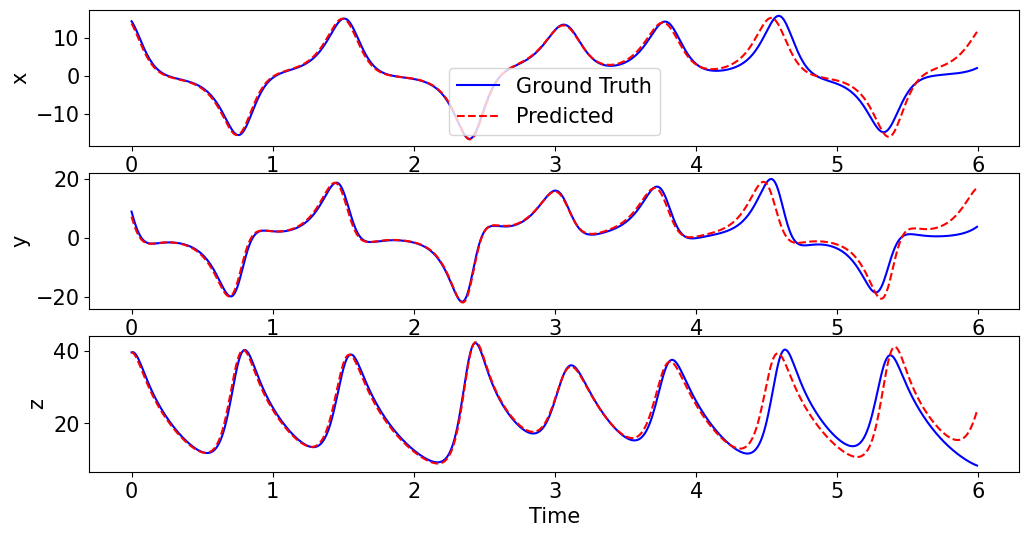

In [20]:
# Predict on Test Data
#x_pred = model.simulate(x_test[0], t_test)
plt.rcParams['font.size'] = 15
x_pred = trajectory.squeeze(1)[:, :-1]
x_test = x_t[4000:4600]
t_test = t[4000:4600]
# Calculate Prediction Error
mse = np.mean((x_pred - x_test) ** 2, axis=0)
print(f"Mean Squared Error for each variable (x, y, z): {mse}")
print(f"Total Mean Squared Error: {np.mean(mse)}")

# Plot Results
fig = plt.figure(figsize=(12, 6))
time = np.arange(x_test.shape[0]) * 0.01
# Plot x
plt.subplot(3, 1, 1)
plt.plot(time, x_test[:, 0], label="Ground Truth", color="blue")
plt.plot(time, x_pred[:, 0], label="Predicted", linestyle="--", color="red")
plt.ylabel("x")
plt.legend()

# Plot y
plt.subplot(3, 1, 2)
plt.plot(time, x_test[:, 1], label="True y", color="blue")
plt.plot(time, x_pred[:, 1], label="Predicted y", linestyle="--", color="red")
plt.ylabel("y")

# Plot z
plt.subplot(3, 1, 3)
plt.plot(time, x_test[:, 2], label="True z", color="blue")
plt.plot(time, x_pred[:, 2], label="Predicted z", linestyle="--", color="red")
plt.ylabel("z")
plt.xlabel("Time")
#plt.legend()
# Save the plot to a PDF file
output_file = "predicted_SNN_p_6.pdf"
plt.savefig(output_file, format="pdf", bbox_inches="tight")
#plt.tight_layout()
plt.show()

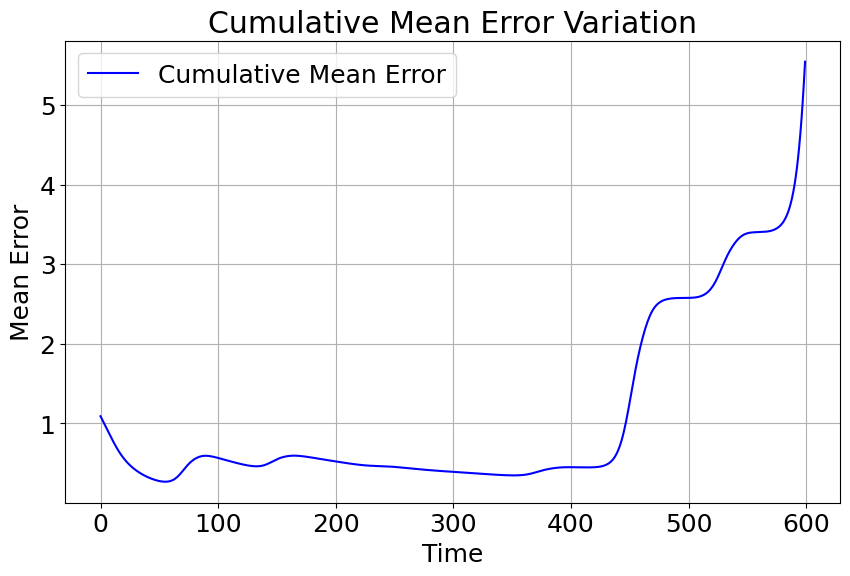

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming x_pred and x_test are already defined as in your code.

# Calculate Prediction Error
error = (x_pred - x_test) ** 2  # Squared error for each variable (x, y, z)
mean_error_per_timestep = np.mean(error, axis=1)  # Mean error across x, y, z for each time step
cumulative_mean_error = np.cumsum(mean_error_per_timestep) / np.arange(1, len(mean_error_per_timestep) + 1)  # Cumulative mean error

# Save to CSV
output_csv_file = "cumulative_mean_error_p_6.csv"
pd.DataFrame({"Time Step": np.arange(len(cumulative_mean_error)), "Cumulative Mean Error": cumulative_mean_error}).to_csv(output_csv_file, index=False)

# Plot Mean Error Variation
plt.figure(figsize=(10, 6))
plt.plot(cumulative_mean_error, label="Cumulative Mean Error", color="blue")
plt.title("Cumulative Mean Error Variation")
plt.xlabel("Time")
plt.ylabel("Mean Error")
plt.legend()
plt.grid()

# # Save the plot to a PDF file
# output_pdf_file = "cumulative_mean_error_single_curve.pdf"
# plt.savefig(output_pdf_file, format="pdf", bbox_inches="tight")
# plt.tight_layout()
# plt.show()

# print(f"Cumulative mean error saved to {output_csv_file}")


# Plot

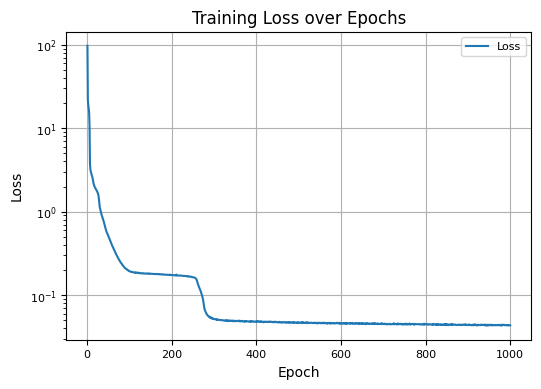

In [39]:
import matplotlib.pyplot as plt
import re

# The provided string with the loss values
loss_string = """
Epoch 1/1000, Loss: 97.50727490
Epoch 2/1000, Loss: 21.79640149
Epoch 3/1000, Loss: 19.04054735
Epoch 4/1000, Loss: 17.36491003
Epoch 5/1000, Loss: 15.44190157
Epoch 6/1000, Loss: 10.39373369
Epoch 7/1000, Loss: 3.78209452
Epoch 8/1000, Loss: 3.20494659
Epoch 9/1000, Loss: 3.01549435
Epoch 10/1000, Loss: 2.88935295
Epoch 11/1000, Loss: 2.78920619
Epoch 12/1000, Loss: 2.67807631
Epoch 13/1000, Loss: 2.54627653
Epoch 14/1000, Loss: 2.38446529
Epoch 15/1000, Loss: 2.22976729
Epoch 16/1000, Loss: 2.12433650
Epoch 17/1000, Loss: 2.05060751
Epoch 18/1000, Loss: 1.99091669
Epoch 19/1000, Loss: 1.94014211
Epoch 20/1000, Loss: 1.90014602
Epoch 21/1000, Loss: 1.86283816
Epoch 22/1000, Loss: 1.82652696
Epoch 23/1000, Loss: 1.79255465
Epoch 24/1000, Loss: 1.74644510
Epoch 25/1000, Loss: 1.69897764
Epoch 26/1000, Loss: 1.64195769
Epoch 27/1000, Loss: 1.55913787
Epoch 28/1000, Loss: 1.44373455
Epoch 29/1000, Loss: 1.27374533
Epoch 30/1000, Loss: 1.13954766
Epoch 31/1000, Loss: 1.08115652
Epoch 32/1000, Loss: 1.03155270
Epoch 33/1000, Loss: 0.97930396
Epoch 34/1000, Loss: 0.93448618
Epoch 35/1000, Loss: 0.89806685
Epoch 36/1000, Loss: 0.85893319
Epoch 37/1000, Loss: 0.83131228
Epoch 38/1000, Loss: 0.80578572
Epoch 39/1000, Loss: 0.77824918
Epoch 40/1000, Loss: 0.74328811
Epoch 41/1000, Loss: 0.70435711
Epoch 42/1000, Loss: 0.67259098
Epoch 43/1000, Loss: 0.64519707
Epoch 44/1000, Loss: 0.61895430
Epoch 45/1000, Loss: 0.59717979
Epoch 46/1000, Loss: 0.57613459
Epoch 47/1000, Loss: 0.56136652
Epoch 48/1000, Loss: 0.54568159
Epoch 49/1000, Loss: 0.53069847
Epoch 50/1000, Loss: 0.51611827
Epoch 51/1000, Loss: 0.50132391
Epoch 52/1000, Loss: 0.48756872
Epoch 53/1000, Loss: 0.47242108
Epoch 54/1000, Loss: 0.45839780
Epoch 55/1000, Loss: 0.44720943
Epoch 56/1000, Loss: 0.43361321
Epoch 57/1000, Loss: 0.41978230
Epoch 58/1000, Loss: 0.41183336
Epoch 59/1000, Loss: 0.39913796
Epoch 60/1000, Loss: 0.38669983
Epoch 61/1000, Loss: 0.37843992
Epoch 62/1000, Loss: 0.36862562
Epoch 63/1000, Loss: 0.35692017
Epoch 64/1000, Loss: 0.34815503
Epoch 65/1000, Loss: 0.34115715
Epoch 66/1000, Loss: 0.33299619
Epoch 67/1000, Loss: 0.32202112
Epoch 68/1000, Loss: 0.31556609
Epoch 69/1000, Loss: 0.30758730
Epoch 70/1000, Loss: 0.30047448
Epoch 71/1000, Loss: 0.29327416
Epoch 72/1000, Loss: 0.28612049
Epoch 73/1000, Loss: 0.27970630
Epoch 74/1000, Loss: 0.27345220
Epoch 75/1000, Loss: 0.26896548
Epoch 76/1000, Loss: 0.26350471
Epoch 77/1000, Loss: 0.25741133
Epoch 78/1000, Loss: 0.25287328
Epoch 79/1000, Loss: 0.24749923
Epoch 80/1000, Loss: 0.24409787
Epoch 81/1000, Loss: 0.24056945
Epoch 82/1000, Loss: 0.23798575
Epoch 83/1000, Loss: 0.23187738
Epoch 84/1000, Loss: 0.22838055
Epoch 85/1000, Loss: 0.22683722
Epoch 86/1000, Loss: 0.22230539
Epoch 87/1000, Loss: 0.21973412
Epoch 88/1000, Loss: 0.21562107
Epoch 89/1000, Loss: 0.21233028
Epoch 90/1000, Loss: 0.21042001
Epoch 91/1000, Loss: 0.20800544
Epoch 92/1000, Loss: 0.20686837
Epoch 93/1000, Loss: 0.20566272
Epoch 94/1000, Loss: 0.20288231
Epoch 95/1000, Loss: 0.20071972
Epoch 96/1000, Loss: 0.20061890
Epoch 97/1000, Loss: 0.19809057
Epoch 98/1000, Loss: 0.19635759
Epoch 99/1000, Loss: 0.19432958
Epoch 100/1000, Loss: 0.19384076
Epoch 101/1000, Loss: 0.19274269
Epoch 102/1000, Loss: 0.19288125
Epoch 103/1000, Loss: 0.19081919
Epoch 104/1000, Loss: 0.19061595
Epoch 105/1000, Loss: 0.18941881
Epoch 106/1000, Loss: 0.18834134
Epoch 107/1000, Loss: 0.18974532
Epoch 108/1000, Loss: 0.18877255
Epoch 109/1000, Loss: 0.18788931
Epoch 110/1000, Loss: 0.18690447
Epoch 111/1000, Loss: 0.18657845
Epoch 112/1000, Loss: 0.18693865
Epoch 113/1000, Loss: 0.18546369
Epoch 114/1000, Loss: 0.18657436
Epoch 115/1000, Loss: 0.18756400
Epoch 116/1000, Loss: 0.18503711
Epoch 117/1000, Loss: 0.18530323
Epoch 118/1000, Loss: 0.18495755
Epoch 119/1000, Loss: 0.18510899
Epoch 120/1000, Loss: 0.18570915
Epoch 121/1000, Loss: 0.18378267
Epoch 122/1000, Loss: 0.18537795
Epoch 123/1000, Loss: 0.18366614
Epoch 124/1000, Loss: 0.18339017
Epoch 125/1000, Loss: 0.18233394
Epoch 126/1000, Loss: 0.18331282
Epoch 127/1000, Loss: 0.18333116
Epoch 128/1000, Loss: 0.18243284
Epoch 129/1000, Loss: 0.18297515
Epoch 130/1000, Loss: 0.18180578
Epoch 131/1000, Loss: 0.18236504
Epoch 132/1000, Loss: 0.18244901
Epoch 133/1000, Loss: 0.18315615
Epoch 134/1000, Loss: 0.18153928
Epoch 135/1000, Loss: 0.18093381
Epoch 136/1000, Loss: 0.18117900
Epoch 137/1000, Loss: 0.18166035
Epoch 138/1000, Loss: 0.18127725
Epoch 139/1000, Loss: 0.18180319
Epoch 140/1000, Loss: 0.18087602
Epoch 141/1000, Loss: 0.18097444
Epoch 142/1000, Loss: 0.18148121
Epoch 143/1000, Loss: 0.18159770
Epoch 144/1000, Loss: 0.18008522
Epoch 145/1000, Loss: 0.18088117
Epoch 146/1000, Loss: 0.18168119
Epoch 147/1000, Loss: 0.18014031
Epoch 148/1000, Loss: 0.18052094
Epoch 149/1000, Loss: 0.17954314
Epoch 150/1000, Loss: 0.18027714
Epoch 151/1000, Loss: 0.18013793
Epoch 152/1000, Loss: 0.17972210
Epoch 153/1000, Loss: 0.17969619
Epoch 154/1000, Loss: 0.17962490
Epoch 155/1000, Loss: 0.17904930
Epoch 156/1000, Loss: 0.17945085
Epoch 157/1000, Loss: 0.17937379
Epoch 158/1000, Loss: 0.17928383
Epoch 159/1000, Loss: 0.17950833
Epoch 160/1000, Loss: 0.17840638
Epoch 161/1000, Loss: 0.17875648
Epoch 162/1000, Loss: 0.17929534
Epoch 163/1000, Loss: 0.17843518
Epoch 164/1000, Loss: 0.17839212
Epoch 165/1000, Loss: 0.17906649
Epoch 166/1000, Loss: 0.17953053
Epoch 167/1000, Loss: 0.17833154
Epoch 168/1000, Loss: 0.17749925
Epoch 169/1000, Loss: 0.17825441
Epoch 170/1000, Loss: 0.17815686
Epoch 171/1000, Loss: 0.17879169
Epoch 172/1000, Loss: 0.17768331
Epoch 173/1000, Loss: 0.17796001
Epoch 174/1000, Loss: 0.17757874
Epoch 175/1000, Loss: 0.17794577
Epoch 176/1000, Loss: 0.17685447
Epoch 177/1000, Loss: 0.17643131
Epoch 178/1000, Loss: 0.17713260
Epoch 179/1000, Loss: 0.17645203
Epoch 180/1000, Loss: 0.17661770
Epoch 181/1000, Loss: 0.17725844
Epoch 182/1000, Loss: 0.17636535
Epoch 183/1000, Loss: 0.17541426
Epoch 184/1000, Loss: 0.17527625
Epoch 185/1000, Loss: 0.17559177
Epoch 186/1000, Loss: 0.17562356
Epoch 187/1000, Loss: 0.17571369
Epoch 188/1000, Loss: 0.17515404
Epoch 189/1000, Loss: 0.17560483
Epoch 190/1000, Loss: 0.17558455
Epoch 191/1000, Loss: 0.17445999
Epoch 192/1000, Loss: 0.17478379
Epoch 193/1000, Loss: 0.17478701
Epoch 194/1000, Loss: 0.17521141
Epoch 195/1000, Loss: 0.17495279
Epoch 196/1000, Loss: 0.17387887
Epoch 197/1000, Loss: 0.17504303
Epoch 198/1000, Loss: 0.17498806
Epoch 199/1000, Loss: 0.17433791
Epoch 200/1000, Loss: 0.17382061
Epoch 201/1000, Loss: 0.17413978
Epoch 202/1000, Loss: 0.17329789
Epoch 203/1000, Loss: 0.17317286
Epoch 204/1000, Loss: 0.17274892
Epoch 205/1000, Loss: 0.17333710
Epoch 206/1000, Loss: 0.17306611
Epoch 207/1000, Loss: 0.17290962
Epoch 208/1000, Loss: 0.17311269
Epoch 209/1000, Loss: 0.17215860
Epoch 210/1000, Loss: 0.17231031
Epoch 211/1000, Loss: 0.17614765
Epoch 212/1000, Loss: 0.17215813
Epoch 213/1000, Loss: 0.17185417
Epoch 214/1000, Loss: 0.17172943
Epoch 215/1000, Loss: 0.17167680
Epoch 216/1000, Loss: 0.17166644
Epoch 217/1000, Loss: 0.17162352
Epoch 218/1000, Loss: 0.17165258
Epoch 219/1000, Loss: 0.17162793
Epoch 220/1000, Loss: 0.17109155
Epoch 221/1000, Loss: 0.17132100
Epoch 222/1000, Loss: 0.17106330
Epoch 223/1000, Loss: 0.17175965
Epoch 224/1000, Loss: 0.17071798
Epoch 225/1000, Loss: 0.17036931
Epoch 226/1000, Loss: 0.17038868
Epoch 227/1000, Loss: 0.16950266
Epoch 228/1000, Loss: 0.16954254
Epoch 229/1000, Loss: 0.16989173
Epoch 230/1000, Loss: 0.16952524
Epoch 231/1000, Loss: 0.16949090
Epoch 232/1000, Loss: 0.16982805
Epoch 233/1000, Loss: 0.16928567
Epoch 234/1000, Loss: 0.16916161
Epoch 235/1000, Loss: 0.16811805
Epoch 236/1000, Loss: 0.16793934
Epoch 237/1000, Loss: 0.16817751
Epoch 238/1000, Loss: 0.16726643
Epoch 239/1000, Loss: 0.16865731
Epoch 240/1000, Loss: 0.16770402
Epoch 241/1000, Loss: 0.16705882
Epoch 242/1000, Loss: 0.16616745
Epoch 243/1000, Loss: 0.16688326
Epoch 244/1000, Loss: 0.16621644
Epoch 245/1000, Loss: 0.16633391
Epoch 246/1000, Loss: 0.16546247
Epoch 247/1000, Loss: 0.16552063
Epoch 248/1000, Loss: 0.16487038
Epoch 249/1000, Loss: 0.16435403
Epoch 250/1000, Loss: 0.16400414
Epoch 251/1000, Loss: 0.16327861
Epoch 252/1000, Loss: 0.16255764
Epoch 253/1000, Loss: 0.16274785
Epoch 254/1000, Loss: 0.16233282
Epoch 255/1000, Loss: 0.16154687
Epoch 256/1000, Loss: 0.16027791
Epoch 257/1000, Loss: 0.15852719
Epoch 258/1000, Loss: 0.15597574
Epoch 259/1000, Loss: 0.15300752
Epoch 260/1000, Loss: 0.14783273
Epoch 261/1000, Loss: 0.14076629
Epoch 262/1000, Loss: 0.13580302
Epoch 263/1000, Loss: 0.13227834
Epoch 264/1000, Loss: 0.12734784
Epoch 265/1000, Loss: 0.12404330
Epoch 266/1000, Loss: 0.12084880
Epoch 267/1000, Loss: 0.11708215
Epoch 268/1000, Loss: 0.11381213
Epoch 269/1000, Loss: 0.10982092
Epoch 270/1000, Loss: 0.10590771
Epoch 271/1000, Loss: 0.10299775
Epoch 272/1000, Loss: 0.09843638
Epoch 273/1000, Loss: 0.09397093
Epoch 274/1000, Loss: 0.08923805
Epoch 275/1000, Loss: 0.08379528
Epoch 276/1000, Loss: 0.07742580
Epoch 277/1000, Loss: 0.07106686
Epoch 278/1000, Loss: 0.06707823
Epoch 279/1000, Loss: 0.06541788
Epoch 280/1000, Loss: 0.06353561
Epoch 281/1000, Loss: 0.06145286
Epoch 282/1000, Loss: 0.06068491
Epoch 283/1000, Loss: 0.05876235
Epoch 284/1000, Loss: 0.05798046
Epoch 285/1000, Loss: 0.05711481
Epoch 286/1000, Loss: 0.05644500
Epoch 287/1000, Loss: 0.05599354
Epoch 288/1000, Loss: 0.05559396
Epoch 289/1000, Loss: 0.05432491
Epoch 290/1000, Loss: 0.05482580
Epoch 291/1000, Loss: 0.05371170
Epoch 292/1000, Loss: 0.05353288
Epoch 293/1000, Loss: 0.05396482
Epoch 294/1000, Loss: 0.05255198
Epoch 295/1000, Loss: 0.05344704
Epoch 296/1000, Loss: 0.05276125
Epoch 297/1000, Loss: 0.05213574
Epoch 298/1000, Loss: 0.05154962
Epoch 299/1000, Loss: 0.05208778
Epoch 300/1000, Loss: 0.05162524
Epoch 301/1000, Loss: 0.05152565
Epoch 302/1000, Loss: 0.05143929
Epoch 303/1000, Loss: 0.05158523
Epoch 304/1000, Loss: 0.05137163
Epoch 305/1000, Loss: 0.05103229
Epoch 306/1000, Loss: 0.05064122
Epoch 307/1000, Loss: 0.05122215
Epoch 308/1000, Loss: 0.05046516
Epoch 309/1000, Loss: 0.05070155
Epoch 310/1000, Loss: 0.05052647
Epoch 311/1000, Loss: 0.05061951
Epoch 312/1000, Loss: 0.05063342
Epoch 313/1000, Loss: 0.05048119
Epoch 314/1000, Loss: 0.05045170
Epoch 315/1000, Loss: 0.05013506
Epoch 316/1000, Loss: 0.05021911
Epoch 317/1000, Loss: 0.05001868
Epoch 318/1000, Loss: 0.05021448
Epoch 319/1000, Loss: 0.04997203
Epoch 320/1000, Loss: 0.05012205
Epoch 321/1000, Loss: 0.04996101
Epoch 322/1000, Loss: 0.04965620
Epoch 323/1000, Loss: 0.04947463
Epoch 324/1000, Loss: 0.04951709
Epoch 325/1000, Loss: 0.04962922
Epoch 326/1000, Loss: 0.04978068
Epoch 327/1000, Loss: 0.04922805
Epoch 328/1000, Loss: 0.04942858
Epoch 329/1000, Loss: 0.05000658
Epoch 330/1000, Loss: 0.04974181
Epoch 331/1000, Loss: 0.04894188
Epoch 332/1000, Loss: 0.04963759
Epoch 333/1000, Loss: 0.04972050
Epoch 334/1000, Loss: 0.04971390
Epoch 335/1000, Loss: 0.04869449
Epoch 336/1000, Loss: 0.04921973
Epoch 337/1000, Loss: 0.04955959
Epoch 338/1000, Loss: 0.04946733
Epoch 339/1000, Loss: 0.04897327
Epoch 340/1000, Loss: 0.04924992
Epoch 341/1000, Loss: 0.04936220
Epoch 342/1000, Loss: 0.04915400
Epoch 343/1000, Loss: 0.04872819
Epoch 344/1000, Loss: 0.04947210
Epoch 345/1000, Loss: 0.04848633
Epoch 346/1000, Loss: 0.04901527
Epoch 347/1000, Loss: 0.04914530
Epoch 348/1000, Loss: 0.04880392
Epoch 349/1000, Loss: 0.04934718
Epoch 350/1000, Loss: 0.04857245
Epoch 351/1000, Loss: 0.04877377
Epoch 352/1000, Loss: 0.04866054
Epoch 353/1000, Loss: 0.04911316
Epoch 354/1000, Loss: 0.04879073
Epoch 355/1000, Loss: 0.04899153
Epoch 356/1000, Loss: 0.04913446
Epoch 357/1000, Loss: 0.04883086
Epoch 358/1000, Loss: 0.04880779
Epoch 359/1000, Loss: 0.04948509
Epoch 360/1000, Loss: 0.04924413
Epoch 361/1000, Loss: 0.04844752
Epoch 362/1000, Loss: 0.04867804
Epoch 363/1000, Loss: 0.04841311
Epoch 364/1000, Loss: 0.04877228
Epoch 365/1000, Loss: 0.04917559
Epoch 366/1000, Loss: 0.04867926
Epoch 367/1000, Loss: 0.04892909
Epoch 368/1000, Loss: 0.04832320
Epoch 369/1000, Loss: 0.04839016
Epoch 370/1000, Loss: 0.04837294
Epoch 371/1000, Loss: 0.04819797
Epoch 372/1000, Loss: 0.04847676
Epoch 373/1000, Loss: 0.04802021
Epoch 374/1000, Loss: 0.04882768
Epoch 375/1000, Loss: 0.04845209
Epoch 376/1000, Loss: 0.04836444
Epoch 377/1000, Loss: 0.04888503
Epoch 378/1000, Loss: 0.04837879
Epoch 379/1000, Loss: 0.04836999
Epoch 380/1000, Loss: 0.04822931
Epoch 381/1000, Loss: 0.04845992
Epoch 382/1000, Loss: 0.04839255
Epoch 383/1000, Loss: 0.04793206
Epoch 384/1000, Loss: 0.04788235
Epoch 385/1000, Loss: 0.04786764
Epoch 386/1000, Loss: 0.04866161
Epoch 387/1000, Loss: 0.04860309
Epoch 388/1000, Loss: 0.04791426
Epoch 389/1000, Loss: 0.04857118
Epoch 390/1000, Loss: 0.04844492
Epoch 391/1000, Loss: 0.04821589
Epoch 392/1000, Loss: 0.04808857
Epoch 393/1000, Loss: 0.04852820
Epoch 394/1000, Loss: 0.04822135
Epoch 395/1000, Loss: 0.04821677
Epoch 396/1000, Loss: 0.04792333
Epoch 397/1000, Loss: 0.04777798
Epoch 398/1000, Loss: 0.04791572
Epoch 399/1000, Loss: 0.04821596
Epoch 400/1000, Loss: 0.04797278
Epoch 401/1000, Loss: 0.04882877
Epoch 402/1000, Loss: 0.04803881
Epoch 403/1000, Loss: 0.04814631
Epoch 404/1000, Loss: 0.04838877
Epoch 405/1000, Loss: 0.04790678
Epoch 406/1000, Loss: 0.04829915
Epoch 407/1000, Loss: 0.04808489
Epoch 408/1000, Loss: 0.04799921
Epoch 409/1000, Loss: 0.04748778
Epoch 410/1000, Loss: 0.04840597
Epoch 411/1000, Loss: 0.04769390
Epoch 412/1000, Loss: 0.04821260
Epoch 413/1000, Loss: 0.04780422
Epoch 414/1000, Loss: 0.04805745
Epoch 415/1000, Loss: 0.04784746
Epoch 416/1000, Loss: 0.04764290
Epoch 417/1000, Loss: 0.04717859
Epoch 418/1000, Loss: 0.04805207
Epoch 419/1000, Loss: 0.04746895
Epoch 420/1000, Loss: 0.04801129
Epoch 421/1000, Loss: 0.04787689
Epoch 422/1000, Loss: 0.04766598
Epoch 423/1000, Loss: 0.04780276
Epoch 424/1000, Loss: 0.04797768
Epoch 425/1000, Loss: 0.04795968
Epoch 426/1000, Loss: 0.04803750
Epoch 427/1000, Loss: 0.04745522
Epoch 428/1000, Loss: 0.04756340
Epoch 429/1000, Loss: 0.04756181
Epoch 430/1000, Loss: 0.04800787
Epoch 431/1000, Loss: 0.04823472
Epoch 432/1000, Loss: 0.04767095
Epoch 433/1000, Loss: 0.04780329
Epoch 434/1000, Loss: 0.04798750
Epoch 435/1000, Loss: 0.04775190
Epoch 436/1000, Loss: 0.04793660
Epoch 437/1000, Loss: 0.04763377
Epoch 438/1000, Loss: 0.04735142
Epoch 439/1000, Loss: 0.04782160
Epoch 440/1000, Loss: 0.04743192
Epoch 441/1000, Loss: 0.04733409
Epoch 442/1000, Loss: 0.04718280
Epoch 443/1000, Loss: 0.04787478
Epoch 444/1000, Loss: 0.04758410
Epoch 445/1000, Loss: 0.04800860
Epoch 446/1000, Loss: 0.04745761
Epoch 447/1000, Loss: 0.04740490
Epoch 448/1000, Loss: 0.04736480
Epoch 449/1000, Loss: 0.04745355
Epoch 450/1000, Loss: 0.04729799
Epoch 451/1000, Loss: 0.04733751
Epoch 452/1000, Loss: 0.04709944
Epoch 453/1000, Loss: 0.04754506
Epoch 454/1000, Loss: 0.04705281
Epoch 455/1000, Loss: 0.04775207
Epoch 456/1000, Loss: 0.04768132
Epoch 457/1000, Loss: 0.04702717
Epoch 458/1000, Loss: 0.04704707
Epoch 459/1000, Loss: 0.04681436
Epoch 460/1000, Loss: 0.04686411
Epoch 461/1000, Loss: 0.04734079
Epoch 462/1000, Loss: 0.04700128
Epoch 463/1000, Loss: 0.04710025
Epoch 464/1000, Loss: 0.04768715
Epoch 465/1000, Loss: 0.04735171
Epoch 466/1000, Loss: 0.04719059
Epoch 467/1000, Loss: 0.04701306
Epoch 468/1000, Loss: 0.04707875
Epoch 469/1000, Loss: 0.04747047
Epoch 470/1000, Loss: 0.04687322
Epoch 471/1000, Loss: 0.04685834
Epoch 472/1000, Loss: 0.04660597
Epoch 473/1000, Loss: 0.04718889
Epoch 474/1000, Loss: 0.04713678
Epoch 475/1000, Loss: 0.04722667
Epoch 476/1000, Loss: 0.04675859
Epoch 477/1000, Loss: 0.04742481
Epoch 478/1000, Loss: 0.04690087
Epoch 479/1000, Loss: 0.04739974
Epoch 480/1000, Loss: 0.04728725
Epoch 481/1000, Loss: 0.04662620
Epoch 482/1000, Loss: 0.04679697
Epoch 483/1000, Loss: 0.04652437
Epoch 484/1000, Loss: 0.04687348
Epoch 485/1000, Loss: 0.04697988
Epoch 486/1000, Loss: 0.04735899
Epoch 487/1000, Loss: 0.04707647
Epoch 488/1000, Loss: 0.04656700
Epoch 489/1000, Loss: 0.04706945
Epoch 490/1000, Loss: 0.04653495
Epoch 491/1000, Loss: 0.04676253
Epoch 492/1000, Loss: 0.04704383
Epoch 493/1000, Loss: 0.04693019
Epoch 494/1000, Loss: 0.04656978
Epoch 495/1000, Loss: 0.04680450
Epoch 496/1000, Loss: 0.04651089
Epoch 497/1000, Loss: 0.04704796
Epoch 498/1000, Loss: 0.04662326
Epoch 499/1000, Loss: 0.04688520
Epoch 500/1000, Loss: 0.04663438
Epoch 501/1000, Loss: 0.04711027
Epoch 502/1000, Loss: 0.04669684
Epoch 503/1000, Loss: 0.04674485
Epoch 504/1000, Loss: 0.04652783
Epoch 505/1000, Loss: 0.04675494
Epoch 506/1000, Loss: 0.04647803
Epoch 507/1000, Loss: 0.04666675
Epoch 508/1000, Loss: 0.04757268
Epoch 509/1000, Loss: 0.04666744
Epoch 510/1000, Loss: 0.04686226
Epoch 511/1000, Loss: 0.04633647
Epoch 512/1000, Loss: 0.04698123
Epoch 513/1000, Loss: 0.04654113
Epoch 514/1000, Loss: 0.04644062
Epoch 515/1000, Loss: 0.04647806
Epoch 516/1000, Loss: 0.04671059
Epoch 517/1000, Loss: 0.04714688
Epoch 518/1000, Loss: 0.04633360
Epoch 519/1000, Loss: 0.04646503
Epoch 520/1000, Loss: 0.04716396
Epoch 521/1000, Loss: 0.04676481
Epoch 522/1000, Loss: 0.04632169
Epoch 523/1000, Loss: 0.04689760
Epoch 524/1000, Loss: 0.04620130
Epoch 525/1000, Loss: 0.04620542
Epoch 526/1000, Loss: 0.04660130
Epoch 527/1000, Loss: 0.04664075
Epoch 528/1000, Loss: 0.04659946
Epoch 529/1000, Loss: 0.04666340
Epoch 530/1000, Loss: 0.04642513
Epoch 531/1000, Loss: 0.04658972
Epoch 532/1000, Loss: 0.04632805
Epoch 533/1000, Loss: 0.04620396
Epoch 534/1000, Loss: 0.04625582
Epoch 535/1000, Loss: 0.04652335
Epoch 536/1000, Loss: 0.04614860
Epoch 537/1000, Loss: 0.04624517
Epoch 538/1000, Loss: 0.04682176
Epoch 539/1000, Loss: 0.04618701
Epoch 540/1000, Loss: 0.04630767
Epoch 541/1000, Loss: 0.04620915
Epoch 542/1000, Loss: 0.04591275
Epoch 543/1000, Loss: 0.04667783
Epoch 544/1000, Loss: 0.04647120
Epoch 545/1000, Loss: 0.04584450
Epoch 546/1000, Loss: 0.04580007
Epoch 547/1000, Loss: 0.04615379
Epoch 548/1000, Loss: 0.04659928
Epoch 549/1000, Loss: 0.04629774
Epoch 550/1000, Loss: 0.04646647
Epoch 551/1000, Loss: 0.04646804
Epoch 552/1000, Loss: 0.04584178
Epoch 553/1000, Loss: 0.04600838
Epoch 554/1000, Loss: 0.04624953
Epoch 555/1000, Loss: 0.04669461
Epoch 556/1000, Loss: 0.04610629
Epoch 557/1000, Loss: 0.04611506
Epoch 558/1000, Loss: 0.04614279
Epoch 559/1000, Loss: 0.04603771
Epoch 560/1000, Loss: 0.04684245
Epoch 561/1000, Loss: 0.04626129
Epoch 562/1000, Loss: 0.04598648
Epoch 563/1000, Loss: 0.04650010
Epoch 564/1000, Loss: 0.04615107
Epoch 565/1000, Loss: 0.04587795
Epoch 566/1000, Loss: 0.04582791
Epoch 567/1000, Loss: 0.04561445
Epoch 568/1000, Loss: 0.04610937
Epoch 569/1000, Loss: 0.04578801
Epoch 570/1000, Loss: 0.04653105
Epoch 571/1000, Loss: 0.04639595
Epoch 572/1000, Loss: 0.04597711
Epoch 573/1000, Loss: 0.04596816
Epoch 574/1000, Loss: 0.04619176
Epoch 575/1000, Loss: 0.04566612
Epoch 576/1000, Loss: 0.04655592
Epoch 577/1000, Loss: 0.04594089
Epoch 578/1000, Loss: 0.04582507
Epoch 579/1000, Loss: 0.04595140
Epoch 580/1000, Loss: 0.04577176
Epoch 581/1000, Loss: 0.04621958
Epoch 582/1000, Loss: 0.04604291
Epoch 583/1000, Loss: 0.04606824
Epoch 584/1000, Loss: 0.04628092
Epoch 585/1000, Loss: 0.04567825
Epoch 586/1000, Loss: 0.04587274
Epoch 587/1000, Loss: 0.04596160
Epoch 588/1000, Loss: 0.04589704
Epoch 589/1000, Loss: 0.04604563
Epoch 590/1000, Loss: 0.04607032
Epoch 591/1000, Loss: 0.04668279
Epoch 592/1000, Loss: 0.04601742
Epoch 593/1000, Loss: 0.04621257
Epoch 594/1000, Loss: 0.04608164
Epoch 595/1000, Loss: 0.04580755
Epoch 596/1000, Loss: 0.04563897
Epoch 597/1000, Loss: 0.04621129
Epoch 598/1000, Loss: 0.04559989
Epoch 599/1000, Loss: 0.04537177
Epoch 600/1000, Loss: 0.04652198
Epoch 601/1000, Loss: 0.04612718
Epoch 602/1000, Loss: 0.04576552
Epoch 603/1000, Loss: 0.04543706
Epoch 604/1000, Loss: 0.04573500
Epoch 605/1000, Loss: 0.04583941
Epoch 606/1000, Loss: 0.04548845
Epoch 607/1000, Loss: 0.04586219
Epoch 608/1000, Loss: 0.04635787
Epoch 609/1000, Loss: 0.04564621
Epoch 610/1000, Loss: 0.04553713
Epoch 611/1000, Loss: 0.04613273
Epoch 612/1000, Loss: 0.04533761
Epoch 613/1000, Loss: 0.04624100
Epoch 614/1000, Loss: 0.04644893
Epoch 615/1000, Loss: 0.04528379
Epoch 616/1000, Loss: 0.04562692
Epoch 617/1000, Loss: 0.04590077
Epoch 618/1000, Loss: 0.04587822
Epoch 619/1000, Loss: 0.04578727
Epoch 620/1000, Loss: 0.04605077
Epoch 621/1000, Loss: 0.04597438
Epoch 622/1000, Loss: 0.04517315
Epoch 623/1000, Loss: 0.04580931
Epoch 624/1000, Loss: 0.04606800
Epoch 625/1000, Loss: 0.04579539
Epoch 626/1000, Loss: 0.04624834
Epoch 627/1000, Loss: 0.04575644
Epoch 628/1000, Loss: 0.04529029
Epoch 629/1000, Loss: 0.04591597
Epoch 630/1000, Loss: 0.04566938
Epoch 631/1000, Loss: 0.04554914
Epoch 632/1000, Loss: 0.04566649
Epoch 633/1000, Loss: 0.04594083
Epoch 634/1000, Loss: 0.04544912
Epoch 635/1000, Loss: 0.04584468
Epoch 636/1000, Loss: 0.04563602
Epoch 637/1000, Loss: 0.04620052
Epoch 638/1000, Loss: 0.04577388
Epoch 639/1000, Loss: 0.04559378
Epoch 640/1000, Loss: 0.04578671
Epoch 641/1000, Loss: 0.04543774
Epoch 642/1000, Loss: 0.04600409
Epoch 643/1000, Loss: 0.04505786
Epoch 644/1000, Loss: 0.04573903
Epoch 645/1000, Loss: 0.04552965
Epoch 646/1000, Loss: 0.04574135
Epoch 647/1000, Loss: 0.04607205
Epoch 648/1000, Loss: 0.04553001
Epoch 649/1000, Loss: 0.04528358
Epoch 650/1000, Loss: 0.04579397
Epoch 651/1000, Loss: 0.04490988
Epoch 652/1000, Loss: 0.04602335
Epoch 653/1000, Loss: 0.04588990
Epoch 654/1000, Loss: 0.04570899
Epoch 655/1000, Loss: 0.04566504
Epoch 656/1000, Loss: 0.04569944
Epoch 657/1000, Loss: 0.04494725
Epoch 658/1000, Loss: 0.04533336
Epoch 659/1000, Loss: 0.04476869
Epoch 660/1000, Loss: 0.04594682
Epoch 661/1000, Loss: 0.04554846
Epoch 662/1000, Loss: 0.04620854
Epoch 663/1000, Loss: 0.04559190
Epoch 664/1000, Loss: 0.04549627
Epoch 665/1000, Loss: 0.04556796
Epoch 666/1000, Loss: 0.04509116
Epoch 667/1000, Loss: 0.04562928
Epoch 668/1000, Loss: 0.04521895
Epoch 669/1000, Loss: 0.04498664
Epoch 670/1000, Loss: 0.04527441
Epoch 671/1000, Loss: 0.04538544
Epoch 672/1000, Loss: 0.04555038
Epoch 673/1000, Loss: 0.04592771
Epoch 674/1000, Loss: 0.04508088
Epoch 675/1000, Loss: 0.04553666
Epoch 676/1000, Loss: 0.04546114
Epoch 677/1000, Loss: 0.04523799
Epoch 678/1000, Loss: 0.04492757
Epoch 679/1000, Loss: 0.04626770
Epoch 680/1000, Loss: 0.04540408
Epoch 681/1000, Loss: 0.04575973
Epoch 682/1000, Loss: 0.04524472
Epoch 683/1000, Loss: 0.04509945
Epoch 684/1000, Loss: 0.04525422
Epoch 685/1000, Loss: 0.04516839
Epoch 686/1000, Loss: 0.04480561
Epoch 687/1000, Loss: 0.04584095
Epoch 688/1000, Loss: 0.04527944
Epoch 689/1000, Loss: 0.04499456
Epoch 690/1000, Loss: 0.04501899
Epoch 691/1000, Loss: 0.04504126
Epoch 692/1000, Loss: 0.04510763
Epoch 693/1000, Loss: 0.04488925
Epoch 694/1000, Loss: 0.04514737
Epoch 695/1000, Loss: 0.04581410
Epoch 696/1000, Loss: 0.04494087
Epoch 697/1000, Loss: 0.04572068
Epoch 698/1000, Loss: 0.04524146
Epoch 699/1000, Loss: 0.04503978
Epoch 700/1000, Loss: 0.04533157
Epoch 701/1000, Loss: 0.04536315
Epoch 702/1000, Loss: 0.04517014
Epoch 703/1000, Loss: 0.04488128
Epoch 704/1000, Loss: 0.04545627
Epoch 705/1000, Loss: 0.04518066
Epoch 706/1000, Loss: 0.04481750
Epoch 707/1000, Loss: 0.04489669
Epoch 708/1000, Loss: 0.04515281
Epoch 709/1000, Loss: 0.04464113
Epoch 710/1000, Loss: 0.04476913
Epoch 711/1000, Loss: 0.04485203
Epoch 712/1000, Loss: 0.04473617
Epoch 713/1000, Loss: 0.04477615
Epoch 714/1000, Loss: 0.04499820
Epoch 715/1000, Loss: 0.04526918
Epoch 716/1000, Loss: 0.04525149
Epoch 717/1000, Loss: 0.04459012
Epoch 718/1000, Loss: 0.04462553
Epoch 719/1000, Loss: 0.04473585
Epoch 720/1000, Loss: 0.04476291
Epoch 721/1000, Loss: 0.04477702
Epoch 722/1000, Loss: 0.04473910
Epoch 723/1000, Loss: 0.04489645
Epoch 724/1000, Loss: 0.04526078
Epoch 725/1000, Loss: 0.04596918
Epoch 726/1000, Loss: 0.04467384
Epoch 727/1000, Loss: 0.04487610
Epoch 728/1000, Loss: 0.04510709
Epoch 729/1000, Loss: 0.04513540
Epoch 730/1000, Loss: 0.04502020
Epoch 731/1000, Loss: 0.04474798
Epoch 732/1000, Loss: 0.04443372
Epoch 733/1000, Loss: 0.04543548
Epoch 734/1000, Loss: 0.04482720
Epoch 735/1000, Loss: 0.04551483
Epoch 736/1000, Loss: 0.04460594
Epoch 737/1000, Loss: 0.04525026
Epoch 738/1000, Loss: 0.04489908
Epoch 739/1000, Loss: 0.04487554
Epoch 740/1000, Loss: 0.04534054
Epoch 741/1000, Loss: 0.04505104
Epoch 742/1000, Loss: 0.04488892
Epoch 743/1000, Loss: 0.04456477
Epoch 744/1000, Loss: 0.04482810
Epoch 745/1000, Loss: 0.04452002
Epoch 746/1000, Loss: 0.04521393
Epoch 747/1000, Loss: 0.04453038
Epoch 748/1000, Loss: 0.04507829
Epoch 749/1000, Loss: 0.04484655
Epoch 750/1000, Loss: 0.04500937
Epoch 751/1000, Loss: 0.04445299
Epoch 752/1000, Loss: 0.04500432
Epoch 753/1000, Loss: 0.04552210
Epoch 754/1000, Loss: 0.04445186
Epoch 755/1000, Loss: 0.04434916
Epoch 756/1000, Loss: 0.04472855
Epoch 757/1000, Loss: 0.04515142
Epoch 758/1000, Loss: 0.04458172
Epoch 759/1000, Loss: 0.04452191
Epoch 760/1000, Loss: 0.04471539
Epoch 761/1000, Loss: 0.04498962
Epoch 762/1000, Loss: 0.04564856
Epoch 763/1000, Loss: 0.04449639
Epoch 764/1000, Loss: 0.04501371
Epoch 765/1000, Loss: 0.04454270
Epoch 766/1000, Loss: 0.04473778
Epoch 767/1000, Loss: 0.04508008
Epoch 768/1000, Loss: 0.04499548
Epoch 769/1000, Loss: 0.04513993
Epoch 770/1000, Loss: 0.04515783
Epoch 771/1000, Loss: 0.04454271
Epoch 772/1000, Loss: 0.04436900
Epoch 773/1000, Loss: 0.04496291
Epoch 774/1000, Loss: 0.04453153
Epoch 775/1000, Loss: 0.04459058
Epoch 776/1000, Loss: 0.04512873
Epoch 777/1000, Loss: 0.04475869
Epoch 778/1000, Loss: 0.04476934
Epoch 779/1000, Loss: 0.04481643
Epoch 780/1000, Loss: 0.04482496
Epoch 781/1000, Loss: 0.04470191
Epoch 782/1000, Loss: 0.04488237
Epoch 783/1000, Loss: 0.04456500
Epoch 784/1000, Loss: 0.04461822
Epoch 785/1000, Loss: 0.04479717
Epoch 786/1000, Loss: 0.04499934
Epoch 787/1000, Loss: 0.04469718
Epoch 788/1000, Loss: 0.04482067
Epoch 789/1000, Loss: 0.04435311
Epoch 790/1000, Loss: 0.04431862
Epoch 791/1000, Loss: 0.04451018
Epoch 792/1000, Loss: 0.04449420
Epoch 793/1000, Loss: 0.04464764
Epoch 794/1000, Loss: 0.04525714
Epoch 795/1000, Loss: 0.04435929
Epoch 796/1000, Loss: 0.04454525
Epoch 797/1000, Loss: 0.04418096
Epoch 798/1000, Loss: 0.04523864
Epoch 799/1000, Loss: 0.04472529
Epoch 800/1000, Loss: 0.04489207
Epoch 801/1000, Loss: 0.04468139
Epoch 802/1000, Loss: 0.04492932
Epoch 803/1000, Loss: 0.04480146
Epoch 804/1000, Loss: 0.04450246
Epoch 805/1000, Loss: 0.04476772
Epoch 806/1000, Loss: 0.04425552
Epoch 807/1000, Loss: 0.04437204
Epoch 808/1000, Loss: 0.04445869
Epoch 809/1000, Loss: 0.04446920
Epoch 810/1000, Loss: 0.04487661
Epoch 811/1000, Loss: 0.04479880
Epoch 812/1000, Loss: 0.04457813
Epoch 813/1000, Loss: 0.04428364
Epoch 814/1000, Loss: 0.04438861
Epoch 815/1000, Loss: 0.04448345
Epoch 816/1000, Loss: 0.04404252
Epoch 817/1000, Loss: 0.04460008
Epoch 818/1000, Loss: 0.04412487
Epoch 819/1000, Loss: 0.04466257
Epoch 820/1000, Loss: 0.04476398
Epoch 821/1000, Loss: 0.04445153
Epoch 822/1000, Loss: 0.04459893
Epoch 823/1000, Loss: 0.04438010
Epoch 824/1000, Loss: 0.04399583
Epoch 825/1000, Loss: 0.04454437
Epoch 826/1000, Loss: 0.04411426
Epoch 827/1000, Loss: 0.04458320
Epoch 828/1000, Loss: 0.04427903
Epoch 829/1000, Loss: 0.04404108
Epoch 830/1000, Loss: 0.04473068
Epoch 831/1000, Loss: 0.04389700
Epoch 832/1000, Loss: 0.04430809
Epoch 833/1000, Loss: 0.04434960
Epoch 834/1000, Loss: 0.04442262
Epoch 835/1000, Loss: 0.04396936
Epoch 836/1000, Loss: 0.04429579
Epoch 837/1000, Loss: 0.04440202
Epoch 838/1000, Loss: 0.04368600
Epoch 839/1000, Loss: 0.04420870
Epoch 840/1000, Loss: 0.04422880
Epoch 841/1000, Loss: 0.04394587
Epoch 842/1000, Loss: 0.04443501
Epoch 843/1000, Loss: 0.04408509
Epoch 844/1000, Loss: 0.04418711
Epoch 845/1000, Loss: 0.04472977
Epoch 846/1000, Loss: 0.04382793
Epoch 847/1000, Loss: 0.04486112
Epoch 848/1000, Loss: 0.04501005
Epoch 849/1000, Loss: 0.04350019
Epoch 850/1000, Loss: 0.04460523
Epoch 851/1000, Loss: 0.04427251
Epoch 852/1000, Loss: 0.04455270
Epoch 853/1000, Loss: 0.04407047
Epoch 854/1000, Loss: 0.04355041
Epoch 855/1000, Loss: 0.04418555
Epoch 856/1000, Loss: 0.04441594
Epoch 857/1000, Loss: 0.04431396
Epoch 858/1000, Loss: 0.04392953
Epoch 859/1000, Loss: 0.04408410
Epoch 860/1000, Loss: 0.04470844
Epoch 861/1000, Loss: 0.04463142
Epoch 862/1000, Loss: 0.04394823
Epoch 863/1000, Loss: 0.04471463
Epoch 864/1000, Loss: 0.04382733
Epoch 865/1000, Loss: 0.04410953
Epoch 866/1000, Loss: 0.04406179
Epoch 867/1000, Loss: 0.04426368
Epoch 868/1000, Loss: 0.04461536
Epoch 869/1000, Loss: 0.04446420
Epoch 870/1000, Loss: 0.04413165
Epoch 871/1000, Loss: 0.04396356
Epoch 872/1000, Loss: 0.04385123
Epoch 873/1000, Loss: 0.04381439
Epoch 874/1000, Loss: 0.04391934
Epoch 875/1000, Loss: 0.04379633
Epoch 876/1000, Loss: 0.04406606
Epoch 877/1000, Loss: 0.04402707
Epoch 878/1000, Loss: 0.04384931
Epoch 879/1000, Loss: 0.04402928
Epoch 880/1000, Loss: 0.04414508
Epoch 881/1000, Loss: 0.04386334
Epoch 882/1000, Loss: 0.04417353
Epoch 883/1000, Loss: 0.04421560
Epoch 884/1000, Loss: 0.04371385
Epoch 885/1000, Loss: 0.04377060
Epoch 886/1000, Loss: 0.04413888
Epoch 887/1000, Loss: 0.04375325
Epoch 888/1000, Loss: 0.04405748
Epoch 889/1000, Loss: 0.04413648
Epoch 890/1000, Loss: 0.04414667
Epoch 891/1000, Loss: 0.04451754
Epoch 892/1000, Loss: 0.04429656
Epoch 893/1000, Loss: 0.04406583
Epoch 894/1000, Loss: 0.04376383
Epoch 895/1000, Loss: 0.04467145
Epoch 896/1000, Loss: 0.04385486
Epoch 897/1000, Loss: 0.04389898
Epoch 898/1000, Loss: 0.04374672
Epoch 899/1000, Loss: 0.04376367
Epoch 900/1000, Loss: 0.04393545
Epoch 901/1000, Loss: 0.04365473
Epoch 902/1000, Loss: 0.04394669
Epoch 903/1000, Loss: 0.04457908
Epoch 904/1000, Loss: 0.04389895
Epoch 905/1000, Loss: 0.04384864
Epoch 906/1000, Loss: 0.04369619
Epoch 907/1000, Loss: 0.04377595
Epoch 908/1000, Loss: 0.04349164
Epoch 909/1000, Loss: 0.04362726
Epoch 910/1000, Loss: 0.04397691
Epoch 911/1000, Loss: 0.04363816
Epoch 912/1000, Loss: 0.04414012
Epoch 913/1000, Loss: 0.04336676
Epoch 914/1000, Loss: 0.04379006
Epoch 915/1000, Loss: 0.04438574
Epoch 916/1000, Loss: 0.04429367
Epoch 917/1000, Loss: 0.04465405
Epoch 918/1000, Loss: 0.04358509
Epoch 919/1000, Loss: 0.04380978
Epoch 920/1000, Loss: 0.04391070
Epoch 921/1000, Loss: 0.04377730
Epoch 922/1000, Loss: 0.04317496
Epoch 923/1000, Loss: 0.04409796
Epoch 924/1000, Loss: 0.04401797
Epoch 925/1000, Loss: 0.04376397
Epoch 926/1000, Loss: 0.04377725
Epoch 927/1000, Loss: 0.04392526
Epoch 928/1000, Loss: 0.04371801
Epoch 929/1000, Loss: 0.04352957
Epoch 930/1000, Loss: 0.04383425
Epoch 931/1000, Loss: 0.04421254
Epoch 932/1000, Loss: 0.04387055
Epoch 933/1000, Loss: 0.04404116
Epoch 934/1000, Loss: 0.04377102
Epoch 935/1000, Loss: 0.04393921
Epoch 936/1000, Loss: 0.04387029
Epoch 937/1000, Loss: 0.04398760
Epoch 938/1000, Loss: 0.04380750
Epoch 939/1000, Loss: 0.04405031
Epoch 940/1000, Loss: 0.04342054
Epoch 941/1000, Loss: 0.04427994
Epoch 942/1000, Loss: 0.04333890
Epoch 943/1000, Loss: 0.04378069
Epoch 944/1000, Loss: 0.04379575
Epoch 945/1000, Loss: 0.04309202
Epoch 946/1000, Loss: 0.04415035
Epoch 947/1000, Loss: 0.04396750
Epoch 948/1000, Loss: 0.04321824
Epoch 949/1000, Loss: 0.04384346
Epoch 950/1000, Loss: 0.04410703
Epoch 951/1000, Loss: 0.04372690
Epoch 952/1000, Loss: 0.04338450
Epoch 953/1000, Loss: 0.04393643
Epoch 954/1000, Loss: 0.04420641
Epoch 955/1000, Loss: 0.04408234
Epoch 956/1000, Loss: 0.04354791
Epoch 957/1000, Loss: 0.04388230
Epoch 958/1000, Loss: 0.04325147
Epoch 959/1000, Loss: 0.04400310
Epoch 960/1000, Loss: 0.04370239
Epoch 961/1000, Loss: 0.04377101
Epoch 962/1000, Loss: 0.04349440
Epoch 963/1000, Loss: 0.04389184
Epoch 964/1000, Loss: 0.04359406
Epoch 965/1000, Loss: 0.04344085
Epoch 966/1000, Loss: 0.04379456
Epoch 967/1000, Loss: 0.04375932
Epoch 968/1000, Loss: 0.04384742
Epoch 969/1000, Loss: 0.04366982
Epoch 970/1000, Loss: 0.04344786
Epoch 971/1000, Loss: 0.04399355
Epoch 972/1000, Loss: 0.04362074
Epoch 973/1000, Loss: 0.04344296
Epoch 974/1000, Loss: 0.04367007
Epoch 975/1000, Loss: 0.04364520
Epoch 976/1000, Loss: 0.04403931
Epoch 977/1000, Loss: 0.04358677
Epoch 978/1000, Loss: 0.04345912
Epoch 979/1000, Loss: 0.04293869
Epoch 980/1000, Loss: 0.04341869
Epoch 981/1000, Loss: 0.04428398
Epoch 982/1000, Loss: 0.04377190
Epoch 983/1000, Loss: 0.04362416
Epoch 984/1000, Loss: 0.04408284
Epoch 985/1000, Loss: 0.04375665
Epoch 986/1000, Loss: 0.04368323
Epoch 987/1000, Loss: 0.04350812
Epoch 988/1000, Loss: 0.04351787
Epoch 989/1000, Loss: 0.04391499
Epoch 990/1000, Loss: 0.04344643
Epoch 991/1000, Loss: 0.04350454
Epoch 992/1000, Loss: 0.04349871
Epoch 993/1000, Loss: 0.04367553
Epoch 994/1000, Loss: 0.04350053
Epoch 995/1000, Loss: 0.04319588
Epoch 996/1000, Loss: 0.04375568
Epoch 997/1000, Loss: 0.04354650
Epoch 998/1000, Loss: 0.04378755
Epoch 999/1000, Loss: 0.04369181
Epoch 1000/1000, Loss: 0.04334316
"""
plt.figure(figsize=(6, 4))  
# Use regular expression to extract loss values
loss_values = [float(loss) for loss in re.findall(r'Loss:\s([\d.]+)', loss_string)]

# Define epochs (since we have 12 loss values, epochs range from 1 to 12)
epochs = list(range(1, len(loss_values) + 1))

# Plotting the loss values
plt.plot(epochs, loss_values, label='Loss')
# Adjust font size for labels and title
plt.xlabel('Epoch', fontsize=10)  # Font size for x-axis label
plt.ylabel('Loss', fontsize=10)   # Font size for y-axis label
plt.title('Training Loss over Epochs', fontsize=12)  # Font size for title

# Adjust font size for tick marks
plt.xticks(fontsize=8)  # Font size for x-axis tick marks
plt.yticks(fontsize=8)  # Font size for y-axis tick marks
plt.yscale('log')
plt.grid(True)
plt.legend(fontsize=8)  # Font size for legend
plt.show()


In [43]:
import pandas as pd
# Create a DataFrame
df = pd.DataFrame({
    'Epoch': epochs,
    'Loss': loss_values
})

# Save DataFrame to CSV
df.to_csv('loss_values_1_head_SNN.csv', index=False)